###### Problem Statement
A Chinese automobile company Geely - Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
-	Which variables are significant in predicting the price of a car
-	How well those variables describe the price of a car
-	Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

###### Business Goal 
Require to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
# set the max rows,column width
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width', 1000)

In [3]:
# import dataset to dataframe
cars_df = pd.read_csv("G:/Machine-learning/Linear Regression/CarPrice_dataset.csv")
cars_df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0
2       3          1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0
3       4          2               audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0
4       5          2                audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0

Sanity test of dataframe

In [4]:
# Check the shape of dataframe
rows,columns = cars_df.shape
print("Original Dataset")
print("Number of rows : ",rows)
print("Number of columns : ",columns)

Original Dataset
Number of rows :  205
Number of columns :  26


In [5]:
# describe the dataframe  for numerical columns to check the mean, standard deviation etc.
cars_df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight   curbweight  enginesize   boreratio      stroke  compressionratio  horsepower      peakrpm     citympg  highwaympg         price
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   205.000000  205.000000  205.000000  205.000000        205.000000  205.000000   205.000000  205.000000  205.000000    205.000000
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878  2555.565854  126.907317    3.329756    3.255415         10.142537  104.117073  5125.121951   25.219512   30.751220  13276.710571
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   520.680204   41.642693    0.270844    0.313597          3.972040   39.544167   476.985643    6.542142    6.886443   7988.852332
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000  1488.000000   61.000000    2.540000    2.070000          7.000000   48.000000  4150.000000   13.000000   16.000000   5118.000000
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000  2145.000000   97.000000    3.150000    3.110000          8.600000   70.000000  4800.000000   19.000000   25.000000   7788.000000
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000  2414.000000  120.000000    3.310000    3.290000          9.000000   95.000000  5200.000000   24.000000   30.000000  10295.000000
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000  2935.000000  141.000000    3.580000    3.410000          9.400000  116.000000  5500.000000   30.000000   34.000000  16503.000000
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000  4066.000000  326.000000    3.940000    4.170000         23.000000  288.000000  6600.000000   49.000000   54.000000  45400.000000

In [6]:
# Check the column names
cars_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'], dtype='object')

In [7]:
# Check the info of the object to check the type of data and null objects
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Data preparation and analysis

Variable "CarName" is composite of two words i.e Company name and model name. It is required to split the "CarName" for the linear regression model and we use the company name for the analysis.

In [8]:
cars_df['Company_Name'] = cars_df['CarName'].apply(lambda x:str(x).split(' ')[0])

cars_df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price Company_Name
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero
2       3          1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero
3       4          2               audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0         audi
4       5          2                audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0         audi

In [9]:
cars_df['Model_Name'] = cars_df['CarName'].apply(lambda x:str(x).split(' ')[1:])
cars_df['Model_Name'] = cars_df['Model_Name'].apply(lambda x: (' ').join(x) if len(x)>1 else ('').join(x))
cars_df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price Company_Name    Model_Name
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero        giulia
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero       stelvio
2       3          1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero  Quadrifoglio
3       4          2               audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0         audi        100 ls
4       5          2                audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0         audi         100ls

In [10]:
# Check the unique Company name of cars
cars_df['Company_Name'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
vw              2
maxda           2
vokswagen       1
toyouta         1
porcshce        1
mercury         1
Nissan          1
Name: Company_Name, dtype: int64

Here we can see that some company name are mis-spelt and it is required to correct the spelling of company name to get the accurate data-set

In [11]:
def correct_car_name(x):
    y = ''
    if x == 'vw':
        y = 'volkswagen'
    elif x == 'toyouta':
        y = 'toyota'
    elif x == 'Nissan':
        y = 'nissan'
    elif x == 'porcshce':
        y = 'porsche'
    elif x == 'vokswagen':
        y = 'volkswagen'
    elif x == 'maxda':
        y = 'mazda'
    else: 
        y = x
    return y

In [12]:
cars_df['Company_Name'] = cars_df['Company_Name'].apply(correct_car_name)
cars_df['Company_Name'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: Company_Name, dtype: int64

In [13]:
# So, the next step is to change the data type of all columns and will change if required.
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [14]:
cars_df.select_dtypes(include = ['object']).head()

CarName fueltype aspiration doornumber      carbody drivewheel enginelocation enginetype cylindernumber fuelsystem Company_Name    Model_Name
0        alfa-romero giulia      gas        std        two  convertible        rwd          front       dohc           four       mpfi  alfa-romero        giulia
1       alfa-romero stelvio      gas        std        two  convertible        rwd          front       dohc           four       mpfi  alfa-romero       stelvio
2  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       ohcv            six       mpfi  alfa-romero  Quadrifoglio
3               audi 100 ls      gas        std       four        sedan        fwd          front        ohc           four       mpfi         audi        100 ls
4                audi 100ls      gas        std       four        sedan        4wd          front        ohc           five       mpfi         audi         100ls

In [15]:
cars_df = cars_df.astype({'symboling': 'category','fueltype':'category','aspiration':'category','doornumber':'category','carbody':'category','drivewheel':'category','enginelocation':'category','enginetype':'category','cylindernumber':'category','fuelsystem':'category','Company_Name':'category','Model_Name':'category'})

In [16]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
car_ID              205 non-null int64
symboling           205 non-null category
CarName             205 non-null object
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-nul

In [17]:
# Here we can drop the variable "car_id", it is just the serial number and has no significance
# We can also drop the Model name because we are considering company name in our model
cars_df = cars_df.drop(['car_ID','Model_Name'],axis =1)

In [18]:
cars_df.head()

symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price Company_Name
0         3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero
1         3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero
2         1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero
3         2               audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0         audi
4         2                audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0         audi

<Figure size 1440x1440 with 0 Axes>

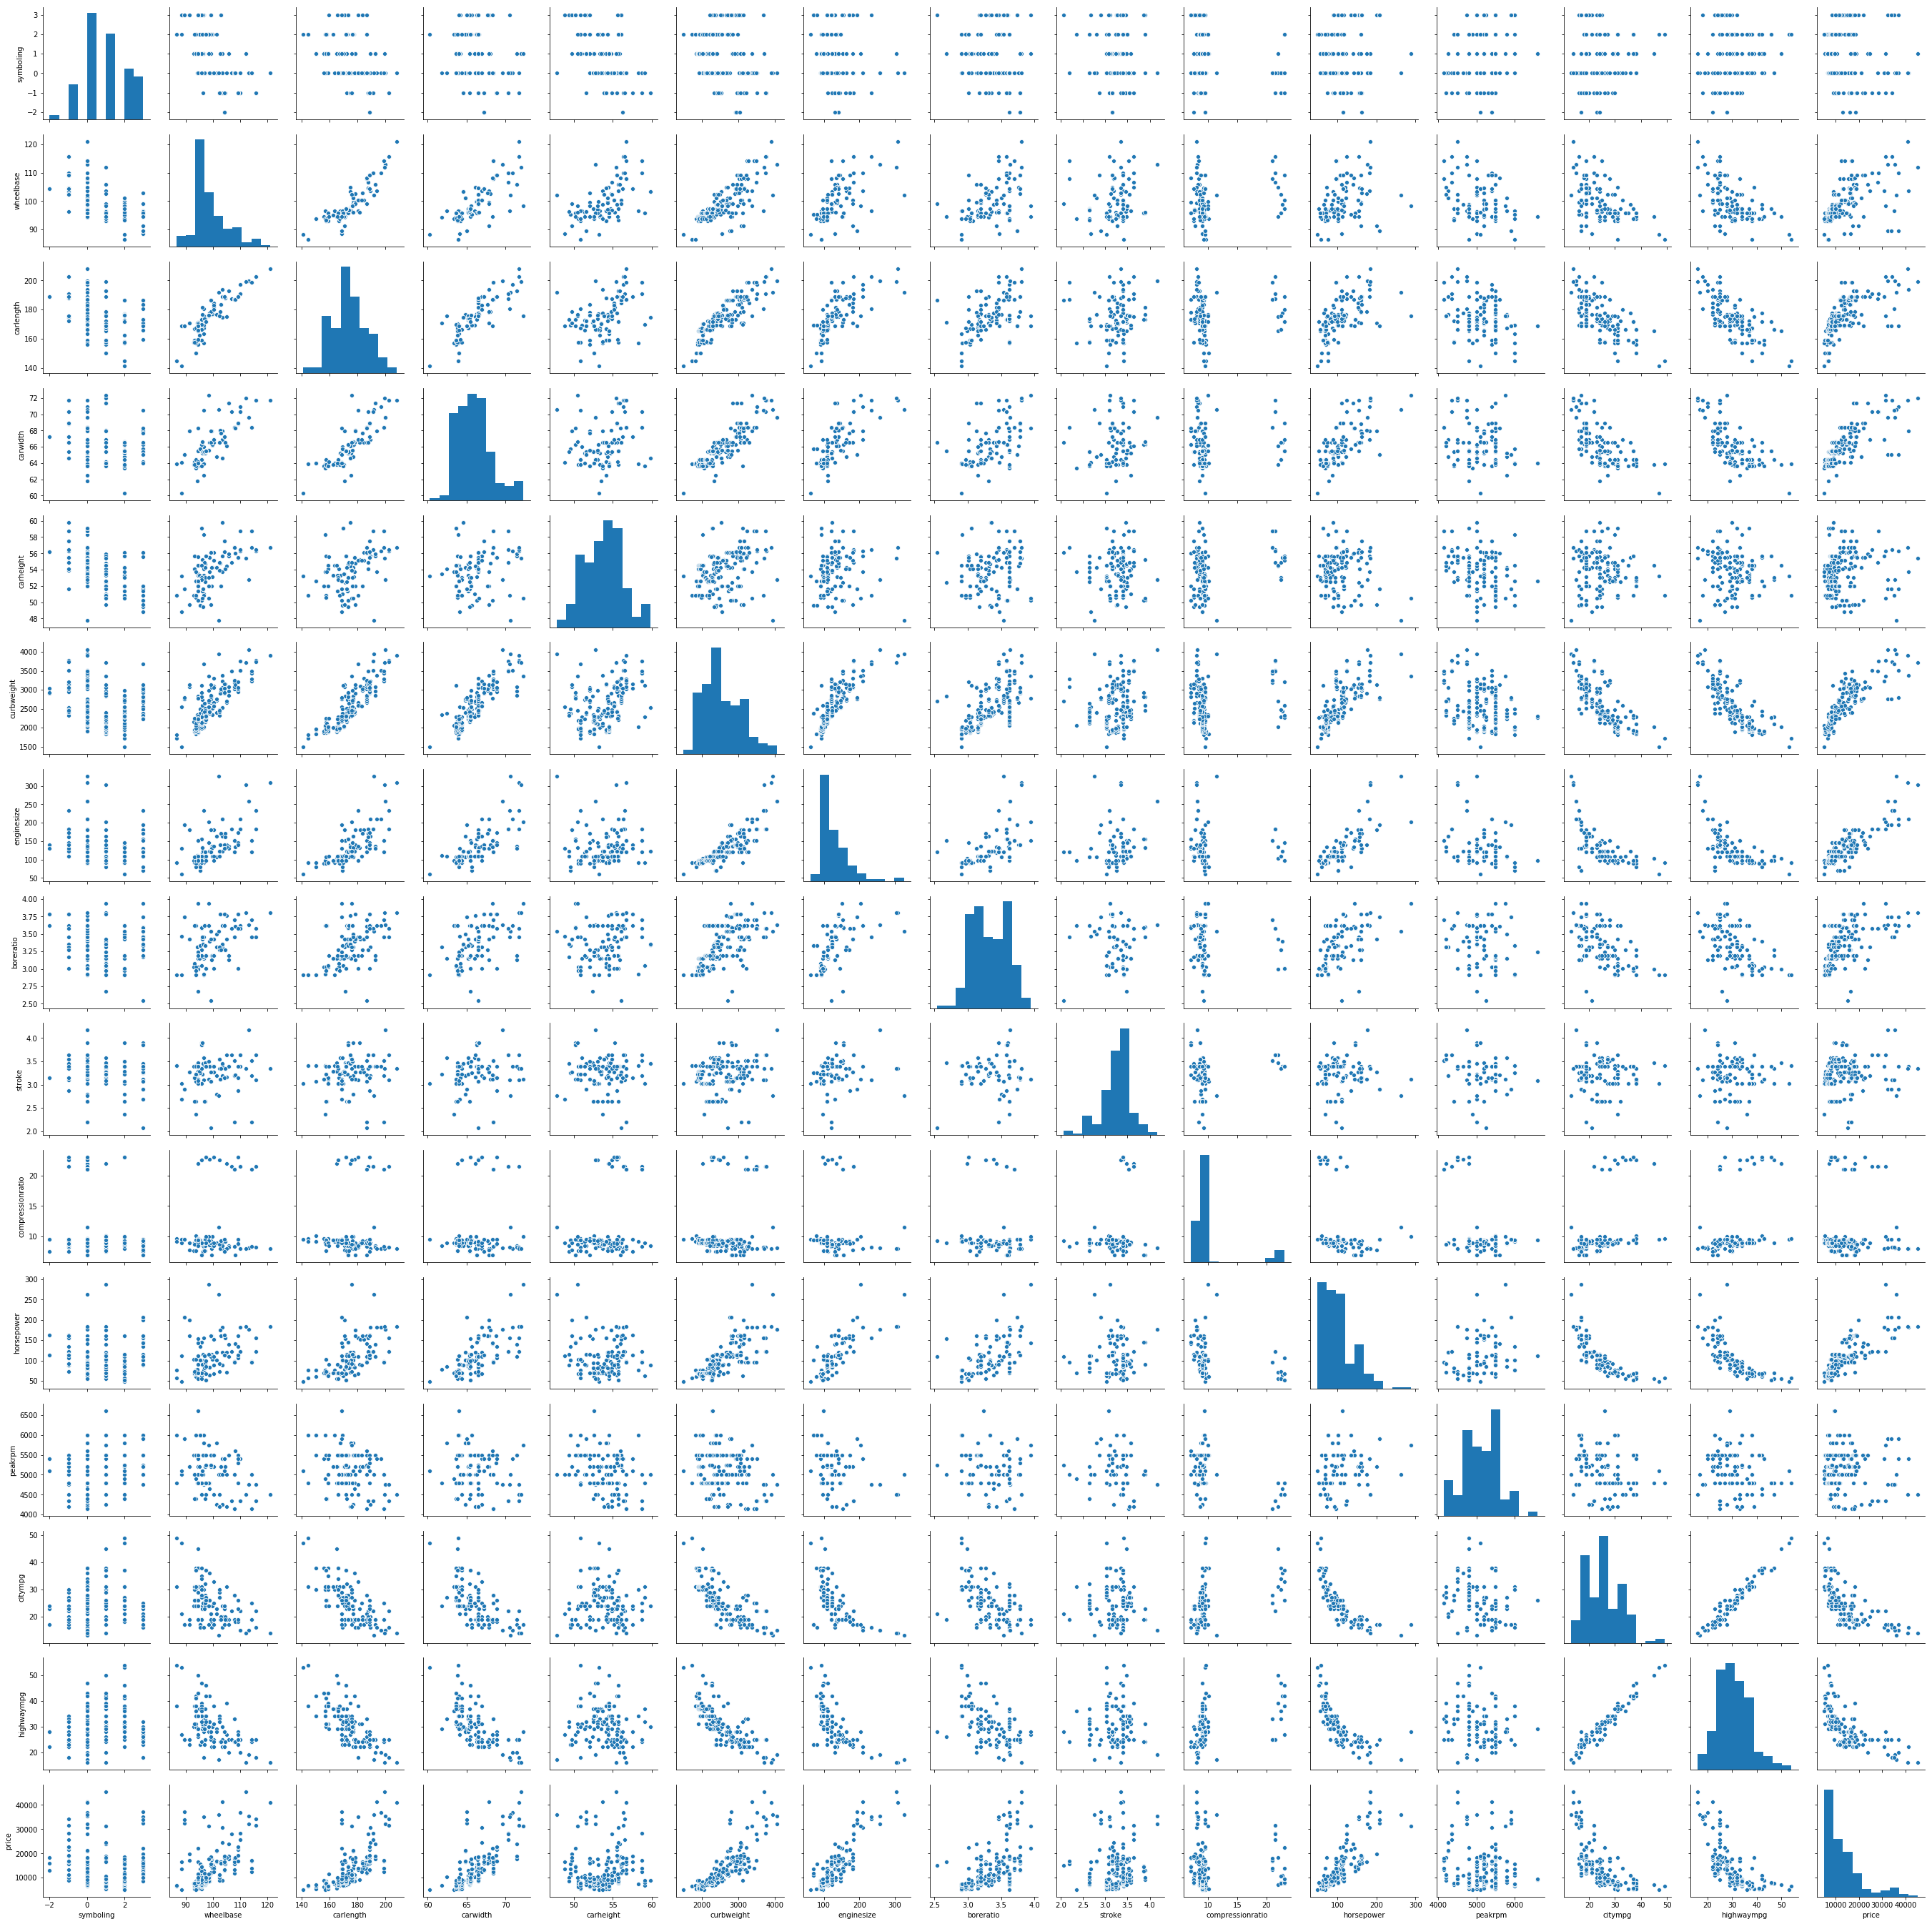

In [19]:
# Visualize the numerical variables

plt.figure(figsize = (20,20))
sns.pairplot(cars_df)
plt.show()

In [20]:
cars_df.select_dtypes(include = ['category']).head()

symboling fueltype aspiration doornumber      carbody drivewheel enginelocation enginetype cylindernumber fuelsystem Company_Name
0         3      gas        std        two  convertible        rwd          front       dohc           four       mpfi  alfa-romero
1         3      gas        std        two  convertible        rwd          front       dohc           four       mpfi  alfa-romero
2         1      gas        std        two    hatchback        rwd          front       ohcv            six       mpfi  alfa-romero
3         2      gas        std       four        sedan        fwd          front        ohc           four       mpfi         audi
4         2      gas        std       four        sedan        4wd          front        ohc           five       mpfi         audi

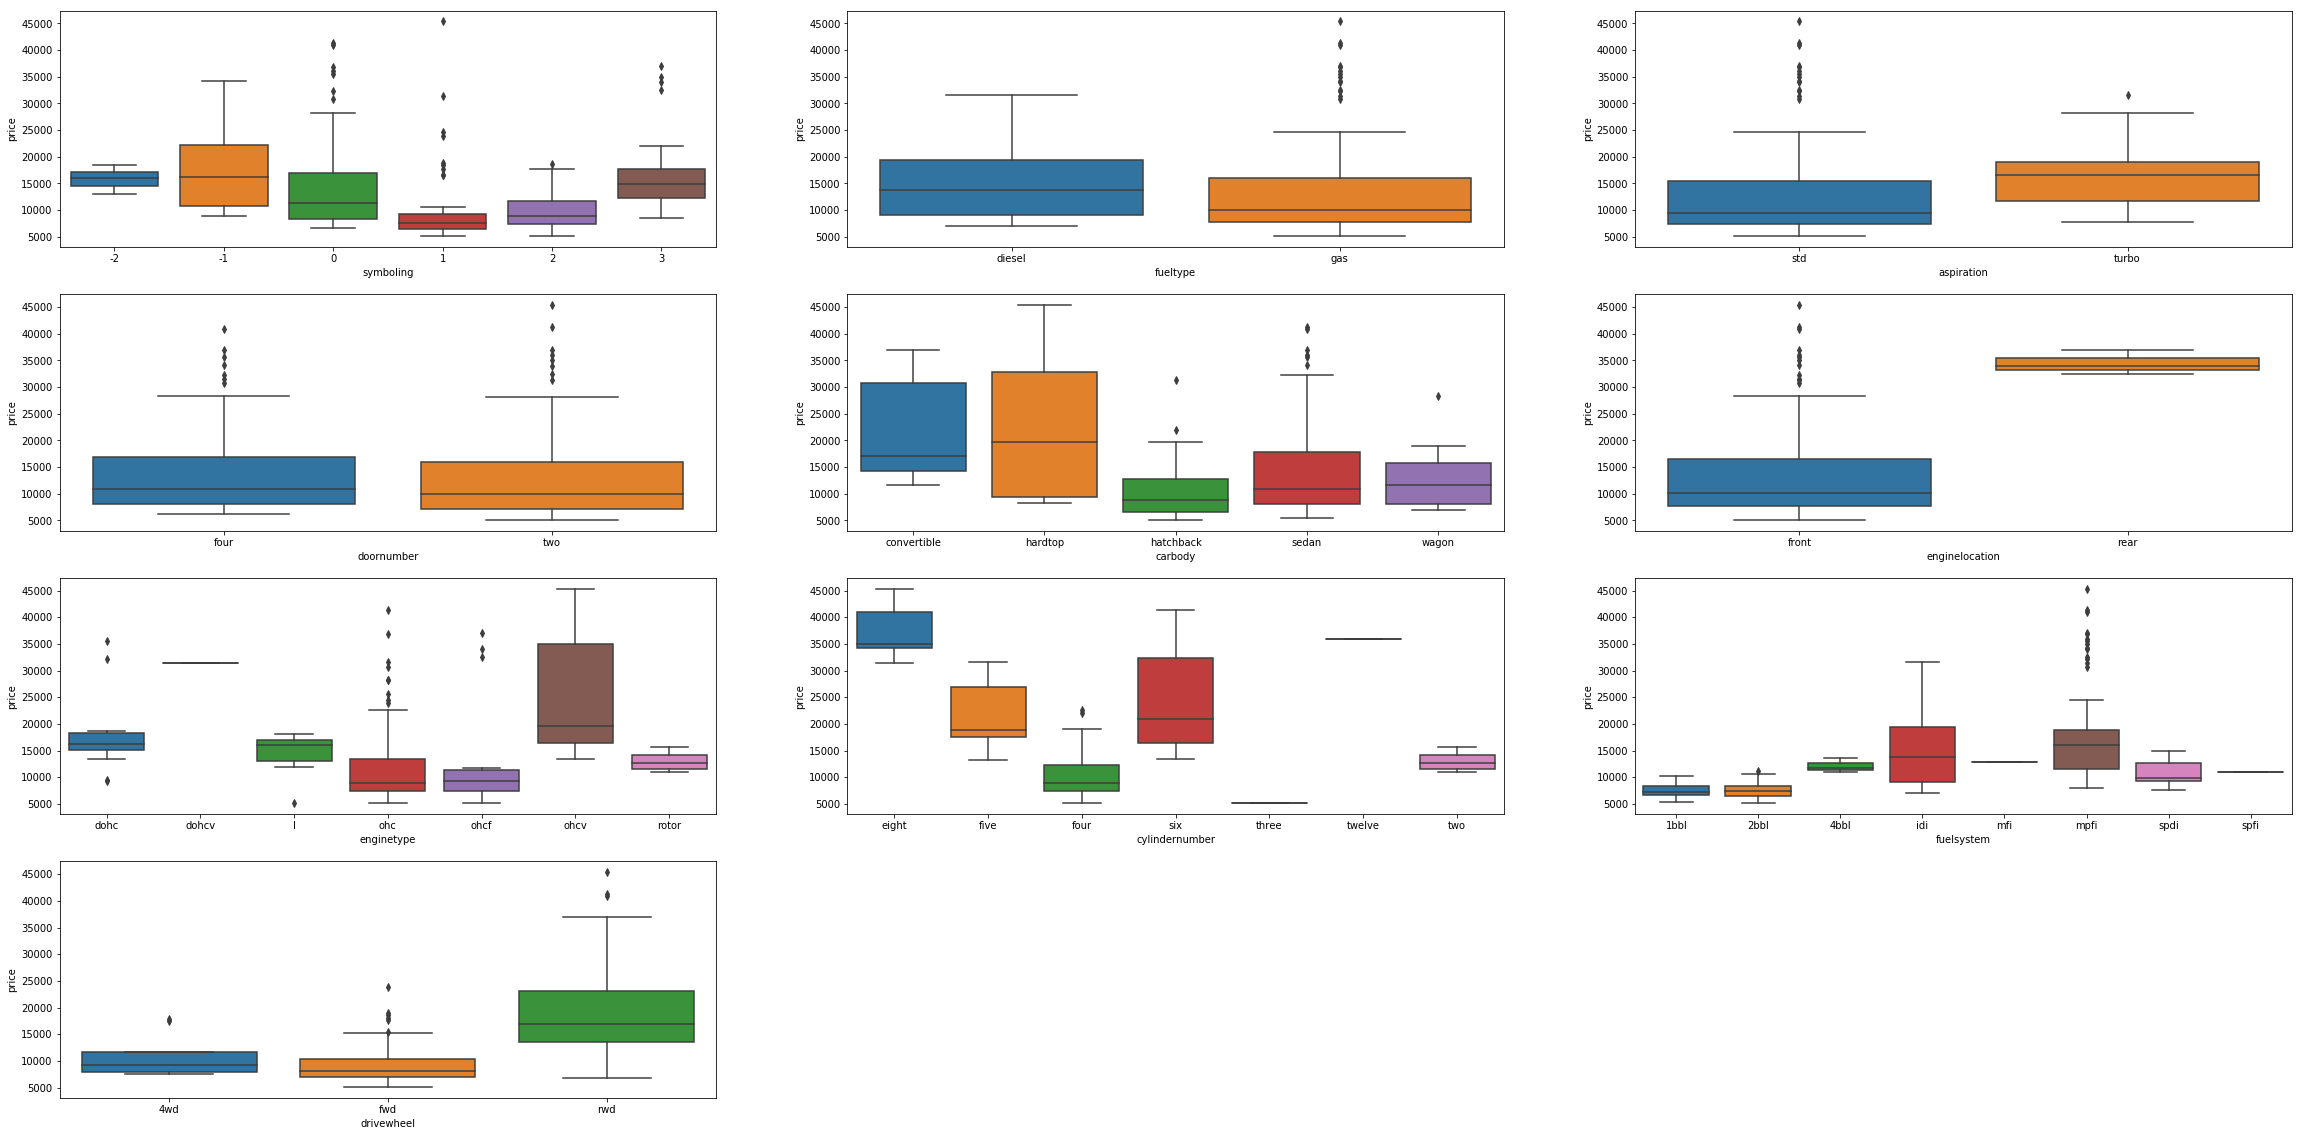

In [21]:
# Visualize the categorical variables vs price of car, this gives us the broad idea of dependency of variable

plt.figure(figsize = (40,20))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling',y='price',data = cars_df)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype',y='price',data = cars_df)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration',y='price',data = cars_df)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber',y='price',data = cars_df)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody',y='price',data = cars_df)
plt.subplot(4,3,6)
sns.boxplot(x = 'enginelocation',y='price',data = cars_df)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginetype',y='price',data = cars_df)
plt.subplot(4,3,8)
sns.boxplot(x = 'cylindernumber',y='price',data = cars_df)
plt.subplot(4,3,9)
sns.boxplot(x = 'fuelsystem',y='price',data = cars_df)
plt.subplot(4,3,10)
sns.boxplot(x = 'drivewheel',y='price',data = cars_df)
plt.show()


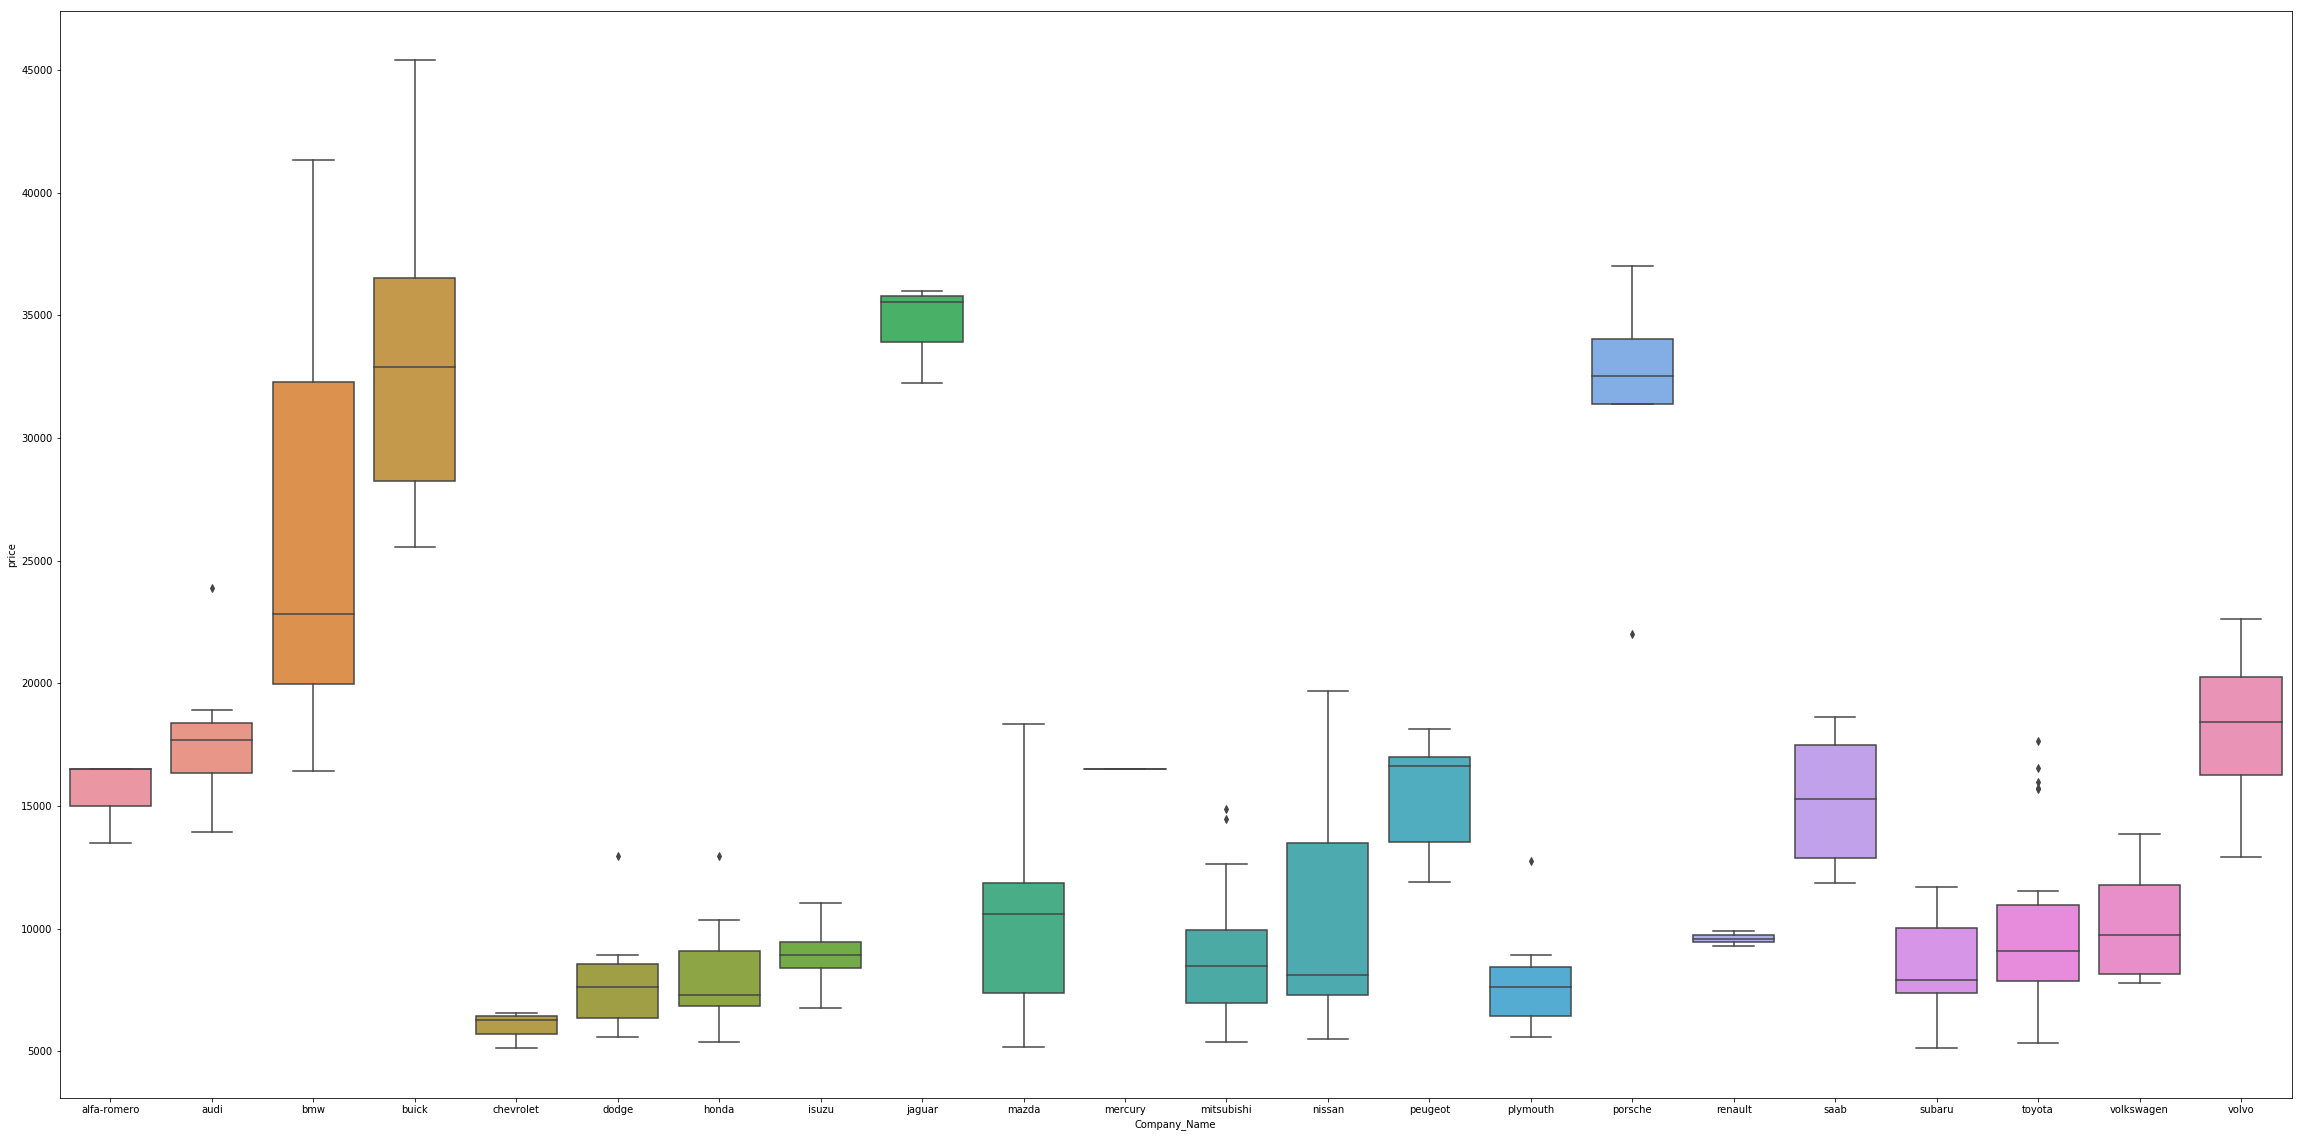

In [22]:
plt.figure(figsize = (40,20))
sns.boxplot(x = 'Company_Name',y='price',data = cars_df)
plt.show()

In [23]:
# Treating the categorical variables to convert them into integer values for further analysis

In [24]:
print(cars_df['doornumber'].value_counts())

four    115
two      90
Name: doornumber, dtype: int64


In [25]:
cars_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [26]:
# Convert the ordered categorical variables to ordered mapped values
cars_df['doornumber'] = cars_df[['doornumber']].apply(lambda x:x.map({'four':4,'two':2}))
cars_df['cylindernumber'] = cars_df[['cylindernumber']].apply(lambda x:x.map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}))

In [27]:
print(cars_df['doornumber'].value_counts())
print("******************************")
print(cars_df['cylindernumber'].value_counts())

4    115
2     90
Name: doornumber, dtype: int64
******************************
4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64


In [28]:
# Check the data-set
cars_df.head()

symboling                   CarName fueltype aspiration  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price Company_Name
0         3        alfa-romero giulia      gas        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero
1         3       alfa-romero stelvio      gas        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero
2         1  alfa-romero Quadrifoglio      gas        std           2    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero
3         2               audi 100 ls      gas        std           4        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0         audi
4         2                audi 100ls      gas        std           4        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0         audi

In [29]:
cars_df.select_dtypes(include = ['category']).head()

symboling fueltype aspiration      carbody drivewheel enginelocation enginetype fuelsystem Company_Name
0         3      gas        std  convertible        rwd          front       dohc       mpfi  alfa-romero
1         3      gas        std  convertible        rwd          front       dohc       mpfi  alfa-romero
2         1      gas        std    hatchback        rwd          front       ohcv       mpfi  alfa-romero
3         2      gas        std        sedan        fwd          front        ohc       mpfi         audi
4         2      gas        std        sedan        4wd          front        ohc       mpfi         audi

In [30]:
# Convert the orderd categorical variables to integer by label encoding

In [31]:
#cars_df['doornumber'] = cars_df['doornumber'].cat.codes

In [32]:
#le = LabelEncoder()
#cars_df['doornumber'] = le.fit_transform(cars_df['doornumber'])
#cars_df['doornumber'].value_counts()

In [33]:
cars_df.select_dtypes(include = ['category']).head()

symboling fueltype aspiration      carbody drivewheel enginelocation enginetype fuelsystem Company_Name
0         3      gas        std  convertible        rwd          front       dohc       mpfi  alfa-romero
1         3      gas        std  convertible        rwd          front       dohc       mpfi  alfa-romero
2         1      gas        std    hatchback        rwd          front       ohcv       mpfi  alfa-romero
3         2      gas        std        sedan        fwd          front        ohc       mpfi         audi
4         2      gas        std        sedan        4wd          front        ohc       mpfi         audi

In [34]:
print(cars_df['symboling'].value_counts())
print("***************************")
print(cars_df['fueltype'].value_counts())
print("***************************")
print(cars_df['aspiration'].value_counts())
print("***************************")
print(cars_df['carbody'].value_counts())
print("***************************")
print(cars_df['drivewheel'].value_counts())
print("***************************")
print(cars_df['enginelocation'].value_counts())
print("***************************")
print(cars_df['enginetype'].value_counts())
print("***************************")
print(cars_df['fuelsystem'].value_counts())
print("***************************")

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
***************************
gas       185
diesel     20
Name: fueltype, dtype: int64
***************************
std      168
turbo     37
Name: aspiration, dtype: int64
***************************
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
***************************
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
***************************
front    202
rear       3
Name: enginelocation, dtype: int64
***************************
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
***************************
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64
***************************


In [35]:
cars_df.select_dtypes(include = ['category']).columns

Index(['symboling', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'Company_Name'], dtype='object')

In [36]:

#dummies_variable = ['symboling',fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem','Company_Name']
# Also, we should drop the first, drop_first = True  to avoid multi-colinearity.
symboling_dummy = pd.get_dummies(cars_df['symboling'],drop_first=True)
fuel_dummy = pd.get_dummies(cars_df['fueltype'],drop_first=True)
aspiration_dummy = pd.get_dummies(cars_df['aspiration'],drop_first=True)
carbody_dummy = pd.get_dummies(cars_df['carbody'],drop_first=True)
drivewheel_dummy = pd.get_dummies(cars_df['drivewheel'],drop_first=True)
enginelocation_dummy = pd.get_dummies(cars_df['enginelocation'],drop_first=True)
fuelsystem_dummy = pd.get_dummies(cars_df['fuelsystem'],drop_first=True)
enginetype_dummy = pd.get_dummies(cars_df['enginetype'],drop_first=True)
Company_Name_dummy = pd.get_dummies(cars_df['Company_Name'],drop_first=True)


In [37]:
# Concat the dummy dataframes with main dataset
pd_list = [cars_df,fuel_dummy,aspiration_dummy,carbody_dummy,symboling_dummy,drivewheel_dummy,enginelocation_dummy,enginetype_dummy,fuelsystem_dummy,Company_Name_dummy]
df = pd.concat(pd_list,axis = 1)
df.head()

symboling                   CarName fueltype aspiration  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price Company_Name  gas  turbo  hardtop  hatchback  sedan  wagon  -1  0  1  2  3  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
0         3        alfa-romero giulia      gas        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero    1      0        0          0      0      0   0  0  0  0  1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
1         3       alfa-romero stelvio      gas        std           2  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc               4         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero    1      0        0          0      0      0   0  0  0  0  1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
2         1  alfa-romero Quadrifoglio      gas        std           2    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv               6         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero    1      0        0          1      0      0   0  0  1  0  0    0    1     0      0  0    0     0     1      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
3         2               audi 100 ls      gas        std           4        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc               4         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0         audi    1      0        0          0      1      0   0  0  0  1  0    1    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
4         2                audi 100ls      gas        std           4        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc               5         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0         audi    1      0        0          0      1      0   0  0  0  1  0    0    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0

In [38]:
# drop the categorical variables those are convertd to dummy variables.
df = df.drop(['symboling','CarName','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem','Company_Name'],axis = 1)
df.head()

doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  gas  turbo  hardtop  hatchback  sedan  wagon  -1  0  1  2  3  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
0           2       88.6      168.8      64.1       48.8        2548               4         130       3.47    2.68               9.0         111     5000       21          27  13495.0    1      0        0          0      0      0   0  0  0  0  1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
1           2       88.6      168.8      64.1       48.8        2548               4         130       3.47    2.68               9.0         111     5000       21          27  16500.0    1      0        0          0      0      0   0  0  0  0  1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
2           2       94.5      171.2      65.5       52.4        2823               6         152       2.68    3.47               9.0         154     5000       19          26  16500.0    1      0        0          1      0      0   0  0  1  0  0    0    1     0      0  0    0     0     1      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
3           4       99.8      176.6      66.2       54.3        2337               4         109       3.19    3.40              10.0         102     5500       24          30  13950.0    1      0        0          0      1      0   0  0  0  1  0    1    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
4           4       99.4      176.6      66.4       54.3        2824               5         136       3.19    3.40               8.0         115     5500       18          22  17450.0    1      0        0          0      1      0   0  0  0  1  0    0    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0

In [39]:
# Check the dataset
df

doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price  gas  turbo  hardtop  hatchback  sedan  wagon  -1  0  1  2  3  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
0             2       88.6      168.8      64.1       48.8        2548               4         130       3.47   2.680              9.00         111     5000       21          27  13495.000    1      0        0          0      0      0   0  0  0  0  1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
1             2       88.6      168.8      64.1       48.8        2548               4         130       3.47   2.680              9.00         111     5000       21          27  16500.000    1      0        0          0      0      0   0  0  0  0  1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
2             2       94.5      171.2      65.5       52.4        2823               6         152       2.68   3.470              9.00         154     5000       19          26  16500.000    1      0        0          1      0      0   0  0  1  0  0    0    1     0      0  0    0     0     1      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
3             4       99.8      176.6      66.2       54.3        2337               4         109       3.19   3.400             10.00         102     5500       24          30  13950.000    1      0        0          0      1      0   0  0  0  1  0    1    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
4             4       99.4      176.6      66.4       54.3        2824               5         136       3.19   3.400              8.00         115     5500       18          22  17450.000    1      0        0          0      1      0   0  0  0  1  0    0    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
5             2       99.8      177.3      66.3       53.1        2507               5         136       3.19   3.400              8.50         110     5500       19          25  15250.000    1      0        0          0      1      0   0  0  0  1  0    1    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
6             4      105.8      192.7      71.4       55.7        2844               5         136       3.19   3.400              8.50         110     5500       19          25  17710.000    1      0        0          0      1      0   0  0  1  0  0    1    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0        0

In [40]:
row,column = df.shape
print("Number of rows and columns after creating dummies and label encode the categorical variables")
print("Rows : ",row)
print("Columns : ", column)

Number of rows and columns after creating dummies and label encode the categorical variables
Rows :  205
Columns :  64


 # Prepare the Model

In [41]:
# Splitting the dataset into Train and test data

df_train,df_test = train_test_split(df,train_size = 0.7,test_size = 0.3,random_state = 100)

In [42]:
# Check the shape of train and test data set after splitting

In [43]:
df_train.shape

(143, 64)

In [44]:
df_test.shape

(62, 64)

In [45]:
# We will use the train set to build the model and will use the test data set for evaluation

In [46]:
df_train.head()

doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  gas  turbo  hardtop  hatchback  sedan  wagon  -1  0  1  2  3  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
122           4       93.7      167.3      63.8       50.8        2191               4          98       2.97    3.23               9.4          68     5500       31          38   7609.0    1      0        0          0      1      0   0  0  1  0  0    1    0     0      0  0    1     0     0      0     1     0    0    0     0     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         1        0        0     0       0       0           0      0
125           2       94.5      168.9      68.3       50.2        2778               4         151       3.94    3.11               9.5         143     5500       19          27  22018.0    1      0        0          1      0      0   0  0  0  0  1    0    1     0      0  0    1     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        1        0     0       0       0           0      0
166           2       94.5      168.7      64.0       52.6        2300               4          98       3.24    3.08               9.4         112     6600       26          29   9538.0    1      0        0          1      0      0   0  0  1  0  0    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       1           0      0
1             2       88.6      168.8      64.1       48.8        2548               4         130       3.47    2.68               9.0         111     5000       21          27  16500.0    1      0        0          0      0      0   0  0  0  0  1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
199           4      104.3      188.8      67.2       57.5        3157               4         130       3.62    3.15               7.5         162     5100       17          22  18950.0    1      1        0          0      0      1   1  0  0  0  0    0    1     0      0  0    1     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      1

In [47]:
cars_df.select_dtypes(include = ['int64','float64']).head()

doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price
0           2       88.6      168.8      64.1       48.8        2548               4         130       3.47    2.68               9.0         111     5000       21          27  13495.0
1           2       88.6      168.8      64.1       48.8        2548               4         130       3.47    2.68               9.0         111     5000       21          27  16500.0
2           2       94.5      171.2      65.5       52.4        2823               6         152       2.68    3.47               9.0         154     5000       19          26  16500.0
3           4       99.8      176.6      66.2       54.3        2337               4         109       3.19    3.40              10.0         102     5500       24          30  13950.0
4           4       99.4      176.6      66.4       54.3        2824               5         136       3.19    3.40               8.0         115     5500       18          22  17450.0

In [48]:
cars_df.select_dtypes(include = ['int64','float64']).columns

Index(['doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'], dtype='object')

# Scaling the numeric variables of train data set

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [50]:
train_num_var = ['doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [51]:
df_train[train_num_var] = scaler.fit_transform(df_train[train_num_var])
df_train.head()


doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  highwaympg     price  gas  turbo  hardtop  hatchback  sedan  wagon  -1  0  1  2  3  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
122         1.0   0.244828   0.426016  0.291667   0.265487    0.272692             0.2    0.139623   0.230159  0.525253           0.15000    0.083333  0.551020  0.500000    0.567568  0.068818    1      0        0          0      1      0   0  0  1  0  0    1    0     0      0  0    1     0     0      0     1     0    0    0     0     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         1        0        0     0       0       0           0      0
125         0.0   0.272414   0.452033  0.666667   0.212389    0.500388             0.2    0.339623   1.000000  0.464646           0.15625    0.395833  0.551020  0.166667    0.270270  0.466890    1      0        0          1      0      0   0  0  0  0  1    0    1     0      0  0    1     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        1        0     0       0       0           0      0
166         0.0   0.272414   0.448780  0.308333   0.424779    0.314973             0.2    0.139623   0.444444  0.449495           0.15000    0.266667  1.000000  0.361111    0.324324  0.122110    1      0        0          1      0      0   0  0  1  0  0    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       1           0      0
1           0.0   0.068966   0.450407  0.316667   0.088496    0.411171             0.2    0.260377   0.626984  0.247475           0.12500    0.262500  0.346939  0.222222    0.270270  0.314446    1      0        0          0      0      0   0  0  0  0  1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
199         1.0   0.610345   0.775610  0.575000   0.858407    0.647401             0.2    0.260377   0.746032  0.484848           0.03125    0.475000  0.387755  0.111111    0.135135  0.382131    1      1        0          0      0      1   1  0  0  0  0    0    1     0      0  0    1     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      1

In [52]:
df_train.columns

Index(['doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', -1, 0, 1, 2, 3, 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype='object')

In [53]:
# Here we are checking the coorelation matrix between the variables

In [54]:
train_corr = df_train.corr()
train_corr

doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  highwaympg     price       gas         turbo   hardtop  hatchback     sedan     wagon        -1         0         1         2         3       fwd       rwd      rear     dohcv         l       ohc      ohcf      ohcv     rotor      2bbl      4bbl       idi  mfi      mpfi      spdi  spfi      audi       bmw     buick  chevrolet     dodge     honda     isuzu    jaguar     mazda  mercury  mitsubishi    nissan   peugeot  plymouth   porsche   renault      saab        subaru    toyota  volkswagen     volvo
doornumber          1.000000   0.462232   0.436645  0.245854   0.554436    0.251023        0.006743    0.081539   0.183979 -0.014726          0.214898   -0.101487 -0.333523 -0.034440   -0.064721  0.075936 -0.231626  8.964215e-02 -0.164957  -0.605838  0.450106  0.347369  0.280624  0.473449 -0.216741 -0.239829 -0.427618 -0.044536 -0.028713 -0.094565 -0.094565  0.171980 -0.025029  0.116173 -0.060031 -0.191160  0.030365 -0.164957  0.231626  NaN -0.006944 -0.165569   NaN  0.015551 -0.025056  0.092233  -0.066670 -0.095313 -0.118033  0.031617  0.031617 -0.062361      NaN   -0.118033 -0.086841  0.216025  0.065114 -0.164957 -0.014260  0.031617  1.504513e-01  0.032944    0.005478  0.185712
wheelbase           0.462232   1.000000   0.877909  0.796888   0.555524    0.792815        0.353865    0.588600   0.482386  0.224970          0.341651    0.382758 -0.347757 -0.476317   -0.542295  0.622591 -0.393481  2.774139e-01 -0.103235  -0.371606  0.333352  0.162160  0.483970  0.270158 -0.344459 -0.159633 -0.216872 -0.499023  0.538721 -0.127454 -0.001739  0.406623 -0.222195 -0.135755  0.108535 -0.092032 -0.438523 -0.079417  0.393481  NaN  0.338923 -0.117645   NaN  0.113322  0.172967  0.353620  -0.149230 -0.169896 -0.163380 -0.100771  0.266365 -0.110961      NaN   -0.142053 -0.157336  0.481538 -0.137718 -0.108163 -0.048575  0.014215 -1.013949e-01 -0.004621   -0.026522  0.288038
carlength           0.436645   0.877909   1.000000  0.846307   0.454721    0.881495        0.444725    0.702794   0.620436  0.176814          0.227958    0.564588 -0.301036 -0.674112   -0.704482  0.713749 -0.275886  2.349248e-01 -0.049558  -0.456829  0.333683  0.195750  0.368505  0.265587 -0.404657 -0.161931 -0.035437 -0.549343  0.567900 -0.030193  0.015262  0.253571 -0.293690 -0.086593  0.211595 -0.059682 -0.502693 -0.051502  0.275886  NaN  0.501706 -0.094743   NaN  0.152884  0.193647  0.303900  -0.250506 -0.268665 -0.266420 -0.146728  0.274602 -0.078316      NaN   -0.119850 -0.077103  0.346285 -0.150217 -0.026237  0.054390  0.153722 -8.065827e-02 -0.040208   -0.005208  0.256437
carwidth            0.245854   0.796888   0.846307  1.000000   0.245022    0.873884        0.551387    0.754925   0.580962  0.233631          0.249516    0.685051 -0.188153 -0.652871   -0.680451  0.799380 -0.293054  3.070265e-01 -0.068989  -0.224067  0.222689  0.019073  0.380148  0.115027 -0.304203 -0.158420  0.054295 -0.500816  0.539726 -0.031943  0.245699  0.193688 -0.290778 -0.108346  0.305924 -0.010753 -0.551596 -0.009279  0.293054  NaN  0.460851 -0.063850   NaN  0.245014  0.080001  0.436530  -0.221580 -0.193474 -0.145629 -0.188408  0.271578 -0.046504      NaN   -0.075155 -0.144592  0.281075 -0.156830  0.178696  0.038331  0.043796 -1.027447e-01 -0.136127   -0.014381  0.209624
carheight           0.554436   0.555524   0.454721  0.245022   1.000000    0.272388       -0.023488    0.045042   0.160835  0.003588          0.289830   -0.151952 -0.358919 -0.006993   -0.073803  0.096631 -0.320231  1.110516e-01 -0.075554  -0.489903  0.247586  0.439328  0.268075  0.358041 -0.240359 -0.038129 -0.423607 -0.119790  0.035752 -0.067534 -0.105596  0.334046  0.075929 -0.017898 -0.099329 -0.276412 -0.067042 -0.238523  0.320231  NaN  0.047857 -0.263335   NaN  0.050878  0.104835  0.173316  -0.069518 -0.246077 -0.017403 -0.063482 -0.145973 -0.067931      NaN   

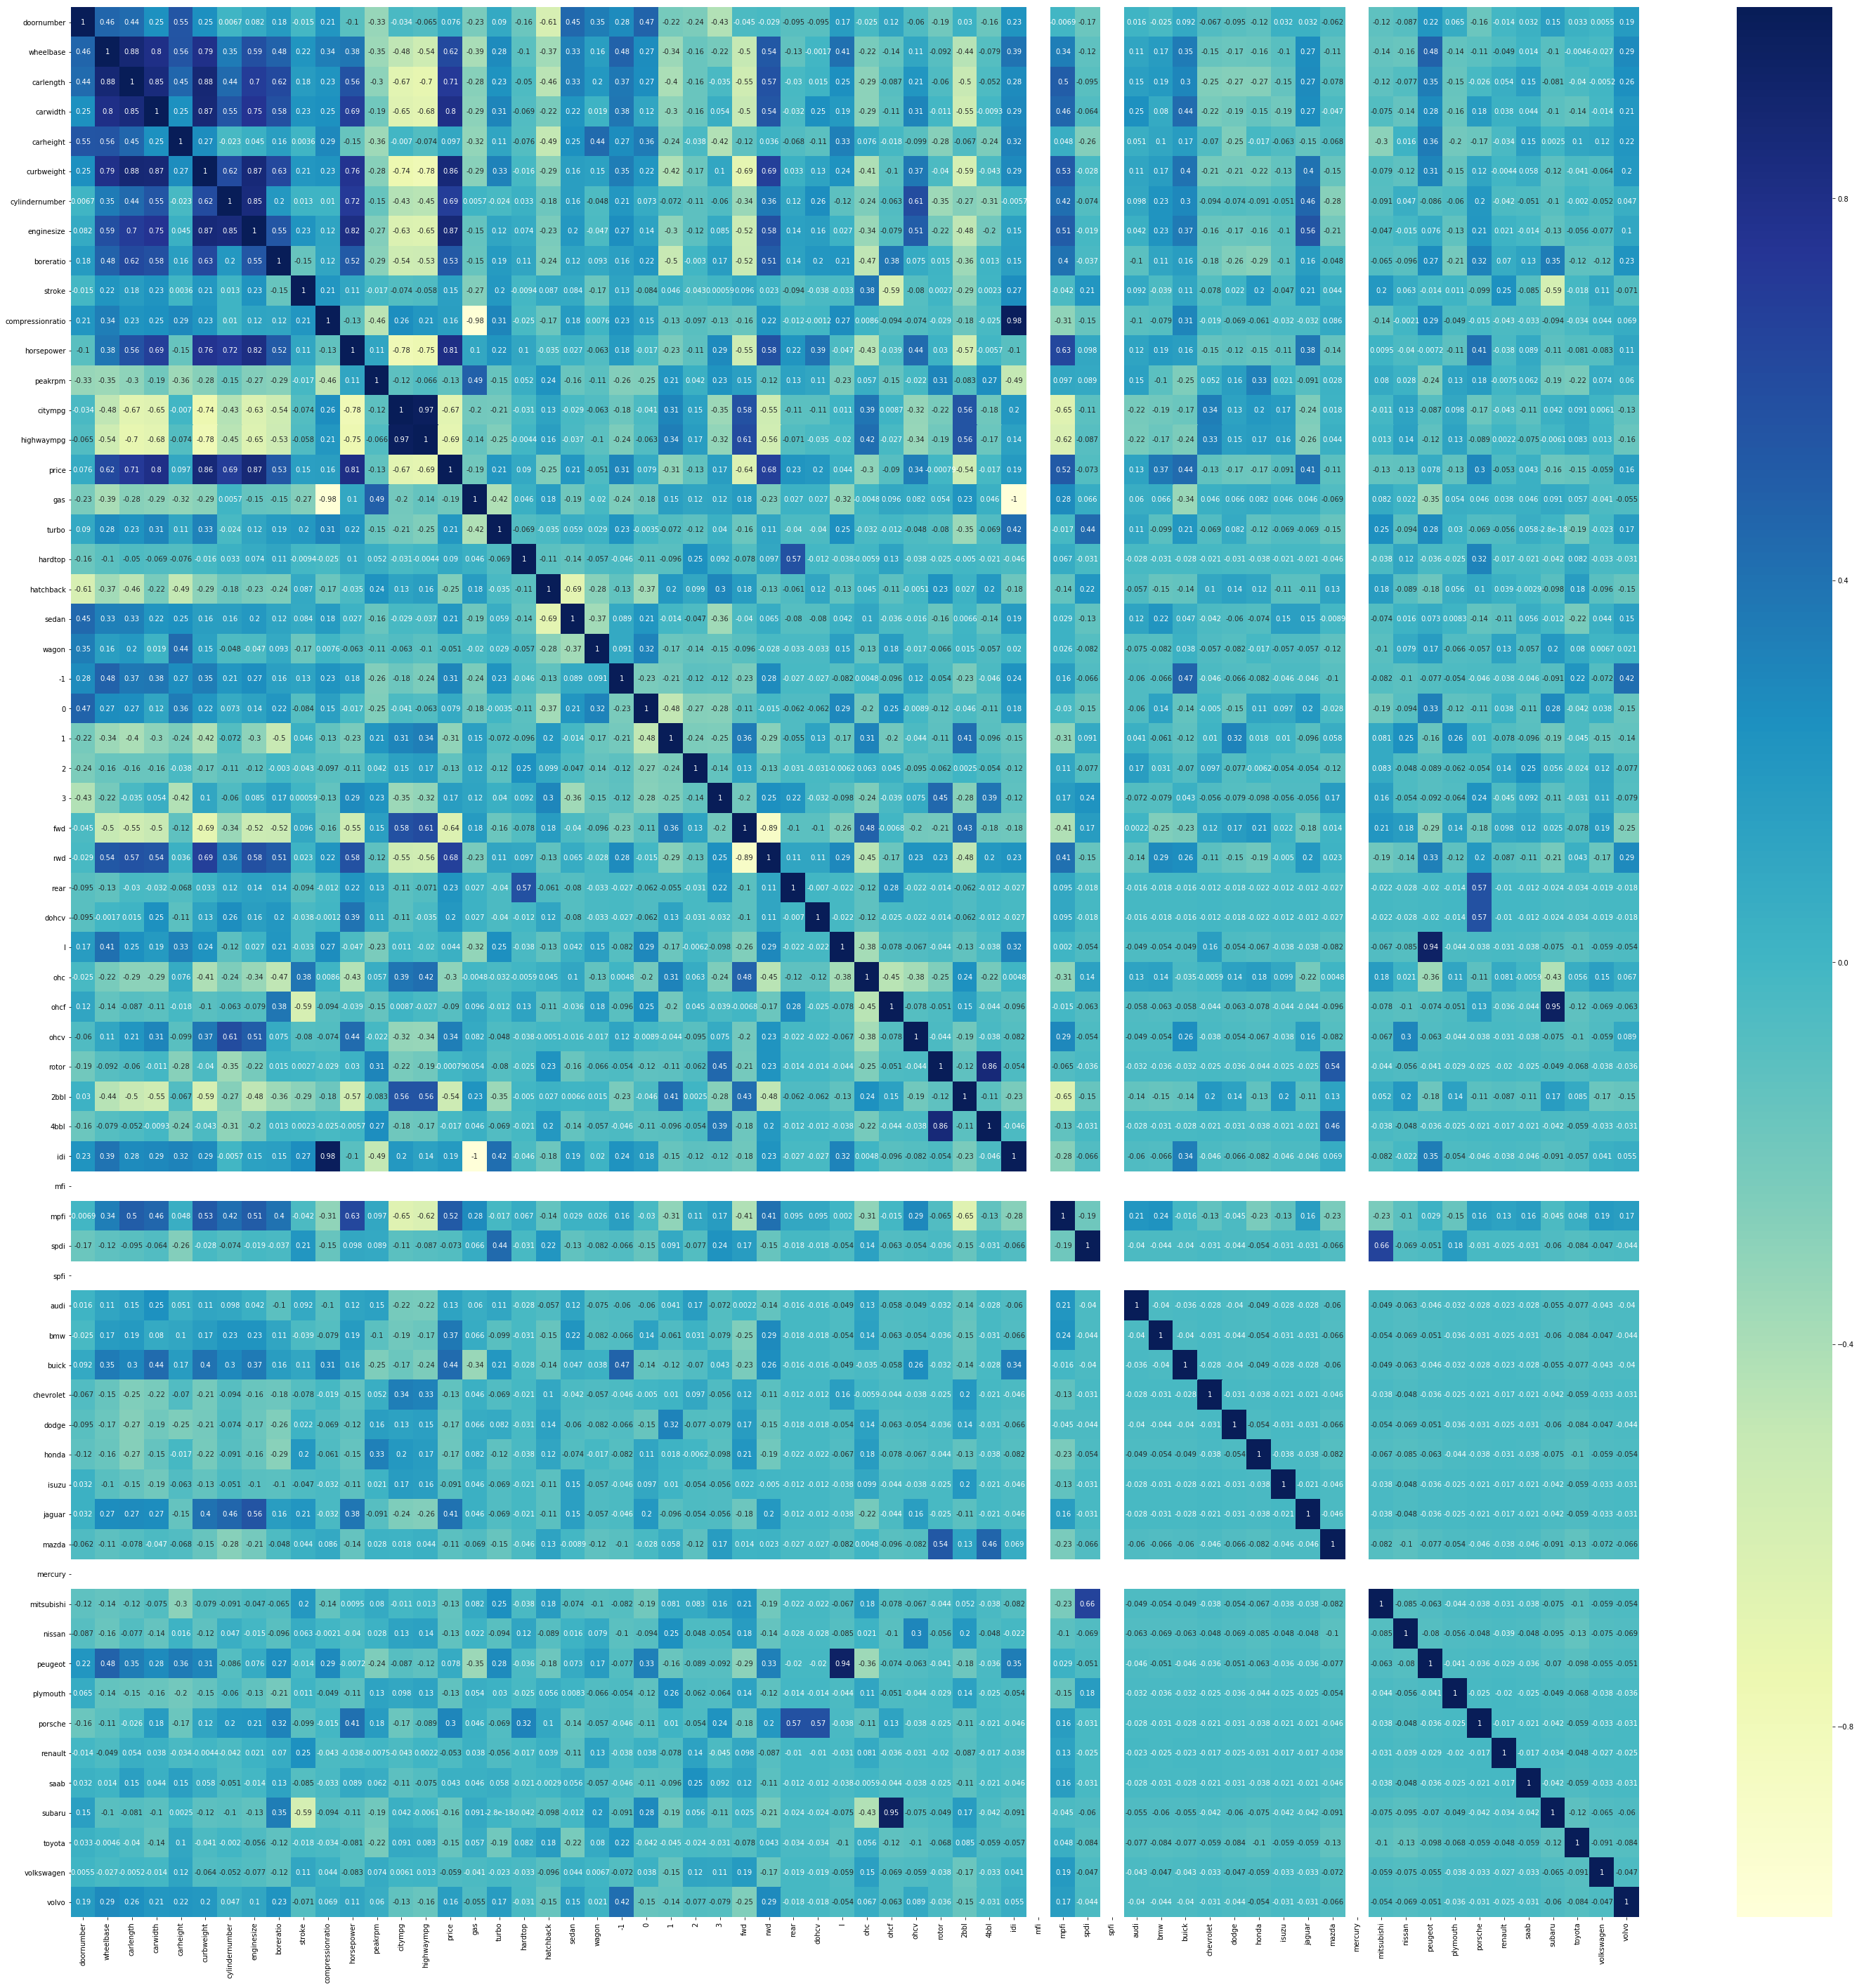

In [55]:
# Heat map to see the co-relation  between the variables
plt.figure(figsize = (50, 50))
sns.heatmap(train_corr, annot = True, cmap="YlGnBu")
plt.show()

# Above heat map is very much complex, we can plot the heat map correlation of float numerical values to see the correlation


In [56]:
train_float = df_train.select_dtypes(include = ['float64'])
train_float_corr = train_float.corr()
train_float_corr

doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  highwaympg     price
doornumber          1.000000   0.462232   0.436645  0.245854   0.554436    0.251023        0.006743    0.081539   0.183979 -0.014726          0.214898   -0.101487 -0.333523 -0.034440   -0.064721  0.075936
wheelbase           0.462232   1.000000   0.877909  0.796888   0.555524    0.792815        0.353865    0.588600   0.482386  0.224970          0.341651    0.382758 -0.347757 -0.476317   -0.542295  0.622591
carlength           0.436645   0.877909   1.000000  0.846307   0.454721    0.881495        0.444725    0.702794   0.620436  0.176814          0.227958    0.564588 -0.301036 -0.674112   -0.704482  0.713749
carwidth            0.245854   0.796888   0.846307  1.000000   0.245022    0.873884        0.551387    0.754925   0.580962  0.233631          0.249516    0.685051 -0.188153 -0.652871   -0.680451  0.799380
carheight           0.554436   0.555524   0.454721  0.245022   1.000000    0.272388       -0.023488    0.045042   0.160835  0.003588          0.289830   -0.151952 -0.358919 -0.006993   -0.073803  0.096631
curbweight          0.251023   0.792815   0.881495  0.873884   0.272388    1.000000        0.616590    0.865102   0.625759  0.209277          0.231862    0.759759 -0.278156 -0.743870   -0.780075  0.861860
cylindernumber      0.006743   0.353865   0.444725  0.551387  -0.023488    0.616590        1.000000    0.850977   0.200822  0.013345          0.010495    0.717291 -0.150271 -0.429785   -0.450519  0.692424
enginesize          0.081539   0.588600   0.702794  0.754925   0.045042    0.865102        0.850977    1.000000   0.545157  0.228768          0.119246    0.817916 -0.265202 -0.627421   -0.646354  0.867915
boreratio           0.183979   0.482386   0.620436  0.580962   0.160835    0.625759        0.200822    0.545157   1.000000 -0.152836          0.116317    0.518307 -0.287938 -0.540514   -0.534084  0.533591
stroke             -0.014726   0.224970   0.176814  0.233631   0.003588    0.209277        0.013345    0.228768  -0.152836  1.000000          0.212200    0.106454 -0.017408 -0.073561   -0.057608  0.152820
compressionratio    0.214898   0.341651   0.227958  0.249516   0.289830    0.231862        0.010495    0.119246   0.116317  0.212200          1.000000   -0.130565 -0.456612  0.260428    0.210307  0.160847
horsepower         -0.101487   0.382758   0.564588  0.685051  -0.151952    0.759759        0.717291    0.817916   0.518307  0.106454         -0.130565    1.000000  0.111035 -0.779219   -0.750843  0.806183
peakrpm            -0.333523  -0.347757  -0.301036 -0.188153  -0.358919   -0.278156       -0.150271   -0.265202  -0.287938 -0.017408         -0.456612    0.111035  1.000000 -0.116336   -0.066008 -0.127431
citympg            -0.034440  -0.476317  -0.674112 -0.652871  -0.006993   -0.743870       -0.429785   -0.627421  -0.540514 -0.073561          0.260428   -0.779219 -0.116336  1.000000    0.973389 -0.674290
highwaympg         -0.064721  -0.542295  -0.704482 -0.680451  -0.073803   -0.780075       -0.450519   -0.646354  -0.534084 -0.057608          0.210307   -0.750843 -0.066008  0.973389    1.000000 -0.688389
price               0.075936   0.622591   0.713749  0.799380   0.096631    0.861860        0.692424    0.867915   0.533591  0.152820          0.160847    0.806183 -0.127431 -0.674290   -0.688389  1.000000

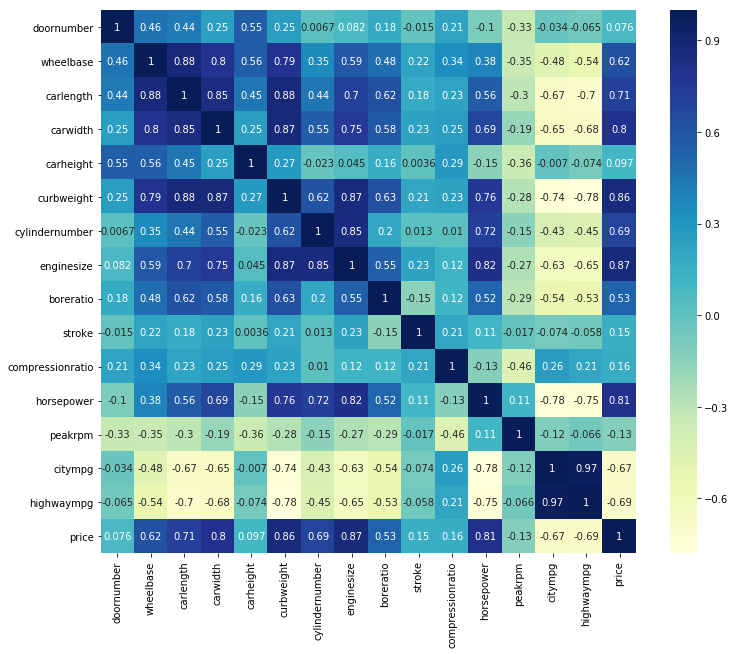

In [57]:
# Plotting the heat map to see the correlation between the numerical float values
plt.figure(figsize = (12, 10))
sns.heatmap(train_float_corr, annot = True, cmap="YlGnBu")
plt.show()

In [58]:
# Now , converting the train data set to X_train and y_train values

In [59]:
y_train = df_train.pop('price')
X_train = df_train

In [60]:
# Check the X_train and y_train

In [61]:
X_train.head()

doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  highwaympg  gas  turbo  hardtop  hatchback  sedan  wagon  -1  0  1  2  3  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
122         1.0   0.244828   0.426016  0.291667   0.265487    0.272692             0.2    0.139623   0.230159  0.525253           0.15000    0.083333  0.551020  0.500000    0.567568    1      0        0          0      1      0   0  0  1  0  0    1    0     0      0  0    1     0     0      0     1     0    0    0     0     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         1        0        0     0       0       0           0      0
125         0.0   0.272414   0.452033  0.666667   0.212389    0.500388             0.2    0.339623   1.000000  0.464646           0.15625    0.395833  0.551020  0.166667    0.270270    1      0        0          1      0      0   0  0  0  0  1    0    1     0      0  0    1     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        1        0     0       0       0           0      0
166         0.0   0.272414   0.448780  0.308333   0.424779    0.314973             0.2    0.139623   0.444444  0.449495           0.15000    0.266667  1.000000  0.361111    0.324324    1      0        0          1      0      0   0  0  1  0  0    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       1           0      0
1           0.0   0.068966   0.450407  0.316667   0.088496    0.411171             0.2    0.260377   0.626984  0.247475           0.12500    0.262500  0.346939  0.222222    0.270270    1      0        0          0      0      0   0  0  0  0  1    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      0
199         1.0   0.610345   0.775610  0.575000   0.858407    0.647401             0.2    0.260377   0.746032  0.484848           0.03125    0.475000  0.387755  0.111111    0.135135    1      1        0          0      0      1   1  0  0  0  0    0    1     0      0  0    1     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           0      1

In [62]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

In [63]:
# Firstly bulid the model with all the variables in train data set using statsmodel

In [64]:
import statsmodels.api as sm

In [65]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     50.28
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           7.74e-47
Time:                        15:56:43   Log-Likelihood:                 272.61
No. Observations:                 143   AIC:                            -427.2
Df Residuals:                      84   BIC:                            -252.4
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1400      0.126      1.112      0.269      -0.110       0.390
doornumber           0.0098      0.016      0.615      0.540      -0.022       0.042
wheelbase            0.1793      0.109      1.646      0.103      -0.037       0.396
carlength           -0.0963      0.107     -0.898      0.372      -0.310       0.117
carwidth             0.2513      0.109      2.296      0.024       0.034       0.469
carheight           -0.1623      0.056     -2.882      0.005      -0.274      -0.050
curbweight           0.2791      0.137      2.036      0.045       0.006       0.552
cylindernumber      -0.5951      0.335     -1.775      0.079      -1.262       0.071
enginesize           1.4336      0.400      3.583      0.001       0.638       2.229
boreratio           -0.3391      0.122     -2.771      0.007      -0.582      -0.096
stroke              -0.1572      0.088     -1.785      0.078      -0.332       0.018
compressionratio    -0.3708      0.260     -1.428      0.157      -0.887       0.146
horsepower          -0.1368      0.193     -0.711      0.479      -0.520       0.246
peakrpm              0.2060      0.057      3.591      0.001       0.092       0.320
citympg              0.0876      0.165      0.529      0.598      -0.241       0.417
highwaympg           0.0714      0.150      0.478      0.634      -0.226       0.369
gas                 -0.0715      0.094     -0.763      0.448      -0.258       0.115
turbo                0.0754      0.032      2.355      0.021       0.012       0.139
hardtop             -0.1434      0.065     -2.195      0.031      -0.273      -0.013
hatchback           -0.1448      0.048     -3.040      0.003      -0.240      -0.050
sedan               -0.1277      0.051     -2.510      0.014      -0.229      -0.027
wagon               -0.1116      0.054     -2.085      0.040      -0.218      -0.005
-1                   0.0561      0.051      1.102      0.274      -0.045       0.157
0                    0.0504      0.061      0.821      0.414      -0.072       0.173
1                    0.0497      0.062      0.796      0.428      -0.074       0.174
2                    0.0552      0.061      0.906      0.368      -0.066       0.177
3                    0.0285      0.063      0.450      0.654      -0.097       0.154
fwd                 -0.0157      0.026     -0.604      0.547      -0.067       0.036
rwd                  0.0068      0.037      0.182      0.856      -0.067       0.081
rear                 0.2085      0.073      2.851      0.005       0.063       0.354
dohcv                0.1770      0.131      1.356      0.179      -0.083       0.436
l                    0.2057      0.071      2.886      0.005       0.064       0.347
ohc                  0.0627      0.032      1.960      0.053      -0.001       0.126
ohcf                 0.

In [66]:
# Also, from the heat-map, we observed that the co-relation between price and engine size is very high (0.87)
# Lets create a model for single variable "enginesize"

In [67]:
X_train_sm = sm.add_constant(X_train['enginesize'])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           1.09e-44
Time:                        15:56:43   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.000      -0.106      -0.040
enginesize     1.2107      0.058     20.748      0.000       1.095       1.326
==============================================================================
Omnibus:                       23.257   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.410
Skew:                           0.885   Prob(JB):                     9.17e-08
Kurtosis:                       4.520   Cond. No.                         6.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Another variable which is highly co-rletaed with price i.e. "horsepower"

In [69]:
X_train_sm = sm.add_constant(X_train['horsepower'])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           6.04e-34
Time:                        15:56:43   Log-Likelihood:                 91.997
No. Observations:                 143   AIC:                            -180.0
Df Residuals:                     141   BIC:                            -174.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0195      0.018     -1.068      0.287      -0.056       0.017
horsepower     1.0506      0.065     16.180      0.000       0.922       1.179
==============================================================================
Omnibus:                       33.630   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.578
Skew:                           1.166   Prob(JB):                     2.32e-12
Kurtosis:                       4.886   Cond. No.                         6.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Another variable which is highly corelated with rprice i.e. "curbweight" (0.86)

In [71]:
X_train_sm = sm.add_constant(X_train['curbweight'])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     407.2
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           2.06e-43
Time:                        15:56:43   Log-Likelihood:                 114.04
No. Observations:                 143   AIC:                            -224.1
Df Residuals:                     141   BIC:                            -218.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1396      0.020     -6.974      0.000      -0.179      -0.100
curbweight     0.8799      0.044     20.180      0.000       0.794       0.966
==============================================================================
Omnibus:                       51.679   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.291
Skew:                           1.232   Prob(JB):                     1.46e-48
Kurtosis:                       8.559   Cond. No.                         5.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# we can combine above variables "enginesize and curbweight" to check the p value nad R-squared

In [73]:
X_train_sm = sm.add_constant(X_train[['enginesize','curbweight']])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           5.31e-50
Time:                        15:56:44   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.000      -0.163      -0.093
enginesize     0.6782      0.105      6.489      0.000       0.472       0.885
curbweight     0.4505      0.076      5.890      0.000       0.299       0.602
==============================================================================
Omnibus:                       36.002   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.998
Skew:                           1.023   Prob(JB):                     2.12e-19
Kurtosis:                       6.202   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Use RFE and manual selection technique for multiple variable selection

In [75]:
# RFE with the output 15 number of variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [76]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('doornumber', False, 43),
 ('wheelbase', False, 13),
 ('carlength', False, 14),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 3),
 ('peakrpm', True, 1),
 ('citympg', False, 16),
 ('highwaympg', False, 46),
 ('gas', False, 8),
 ('turbo', False, 5),
 ('hardtop', False, 19),
 ('hatchback', False, 18),
 ('sedan', False, 20),
 ('wagon', False, 21),
 (-1, False, 27),
 (0, False, 28),
 (1, False, 29),
 (2, False, 30),
 (3, False, 31),
 ('fwd', False, 47),
 ('rwd', False, 40),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', True, 1),
 ('ohc', False, 23),
 ('ohcf', False, 22),
 ('ohcv', False, 44),
 ('rotor', False, 2),
 ('2bbl', False, 39),
 ('4bbl', False, 25),
 ('idi', True, 1),
 ('mfi', False, 45),
 ('mpfi', False, 41),
 ('spdi', False, 48),
 ('spfi', False, 49),
 ('audi', False, 37),
 ('bmw', True, 1),

In [77]:
# Columns which support the RFE
train_col_support =  X_train.columns[rfe.support_]
train_col_support

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'rear', 'dohcv', 'l', 'idi', 'bmw', 'peugeot', 'porsche'], dtype='object')

In [78]:
# Columns which are against the RFE
X_train.columns[~rfe.support_]

Index(['doornumber', 'wheelbase', 'carlength', 'carheight', 'horsepower', 'citympg', 'highwaympg', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', -1, 0, 1, 2, 3, 'fwd', 'rwd', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'plymouth', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype='object')

In [79]:
# Creating X_train for the RFE selected variables
X_train_rfe = X_train[train_col_support]
# Adding constant variable for statsmodel
X_train_lm = sm.add_constant(X_train_rfe)
# linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
# print summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     125.4
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           1.94e-68
Time:                        15:56:44   Log-Likelihood:                 214.35
No. Observations:                 143   AIC:                            -396.7
Df Residuals:                     127   BIC:                            -349.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1591      0.071      2.246      0.026       0.019       0.299
carwidth             0.4104      0.061      6.703      0.000       0.289       0.532
curbweight           0.2790      0.078      3.600      0.000       0.126       0.432
cylindernumber      -1.0327      0.198     -5.222      0.000      -1.424      -0.641
enginesize           1.4273      0.209      6.845      0.000       1.015       1.840
boreratio           -0.3754      0.066     -5.707      0.000      -0.506      -0.245
stroke              -0.3698      0.062     -5.949      0.000      -0.493      -0.247
compressionratio    -0.1505      0.140     -1.079      0.283      -0.427       0.126
peakrpm              0.1138      0.033      3.483      0.001       0.049       0.178
rear                 0.3046      0.085      3.593      0.000       0.137       0.472
dohcv                0.1848      0.093      1.992      0.048       0.001       0.368
l                    0.1499      0.060      2.501      0.014       0.031       0.268
idi                  0.2034      0.122      1.664      0.098      -0.038       0.445
bmw                  0.2527      0.025     10.013      0.000       0.203       0.303
peugeot             -0.2789      0.066     -4.219      0.000      -0.410      -0.148
porsche              0.1244      0.061      2.040      0.043       0.004       0.245
==============================================================================
Omnibus:                        7.270   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                8.593
Skew:                           0.337   Prob(JB):                       0.0136
Kurtosis:                       3.993   Cond. No.                         96.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
X_train_rfe.columns

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'rear', 'dohcv', 'l', 'idi', 'bmw', 'peugeot', 'porsche'], dtype='object')

In [81]:
X_train_lm.columns

Index(['const', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'rear', 'dohcv', 'l', 'idi', 'bmw', 'peugeot', 'porsche'], dtype='object')

In [82]:
# to check the VIF, it is required to drop the "const" variable

In [83]:
#X_train_new = X_train_rfe.drop(['const'],axis = 1)
#X_train_new.columns

In [84]:
# import library to check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 15 columns):
carwidth            143 non-null float64
curbweight          143 non-null float64
cylindernumber      143 non-null float64
enginesize          143 non-null float64
boreratio           143 non-null float64
stroke              143 non-null float64
compressionratio    143 non-null float64
peakrpm             143 non-null float64
rear                143 non-null uint8
dohcv               143 non-null uint8
l                   143 non-null uint8
idi                 143 non-null uint8
bmw                 143 non-null uint8
peugeot             143 non-null uint8
porsche             143 non-null uint8
dtypes: float64(8), uint8(7)
memory usage: 11.0 KB


In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6   compressionratio  68.69
11               idi  52.02
3         enginesize  51.27
1         curbweight  48.97
0           carwidth  39.45
2     cylindernumber  36.44
4          boreratio  13.91
5             stroke  11.57
13           peugeot  10.46
10                 l   9.51
7            peakrpm   8.89
14           porsche   3.37
9              dohcv   2.18
8               rear   2.17
12               bmw   1.16

In [87]:
X_train_new = X_train_rfe.drop(['compressionratio'],axis = 1)
X_train_new.columns

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'rear', 'dohcv', 'l', 'idi', 'bmw', 'peugeot', 'porsche'], dtype='object')

In [88]:
# Summary stats OLS model

In [89]:
# Adding constant variable for statsmodel
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     134.1
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           2.91e-69
Time:                        15:56:45   Log-Likelihood:                 213.70
No. Observations:                 143   AIC:                            -397.4
Df Residuals:                     128   BIC:                            -353.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1326      0.066      1.994      0.048       0.001       0.264
carwidth           0.4079      0.061      6.663      0.000       0.287       0.529
curbweight         0.2977      0.076      3.937      0.000       0.148       0.447
cylindernumber    -1.0383      0.198     -5.249      0.000      -1.430      -0.647
enginesize         1.4098      0.208      6.777      0.000       0.998       1.821
boreratio         -0.3708      0.066     -5.645      0.000      -0.501      -0.241
stroke            -0.3548      0.061     -5.852      0.000      -0.475      -0.235
peakrpm            0.1091      0.032      3.367      0.001       0.045       0.173
rear               0.3111      0.085      3.676      0.000       0.144       0.479
dohcv              0.1829      0.093      1.970      0.051      -0.001       0.367
l                  0.1480      0.060      2.470      0.015       0.029       0.267
idi                0.0737      0.022      3.337      0.001       0.030       0.117
bmw                0.2548      0.025     10.118      0.000       0.205       0.305
peugeot           -0.2716      0.066     -4.127      0.000      -0.402      -0.141
porsche            0.1178      0.061      1.941      0.054      -0.002       0.238
==============================================================================
Omnibus:                        8.255   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.630
Skew:                           0.346   Prob(JB):                      0.00492
Kurtosis:                       4.142   Cond. No.                         95.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# Now, we will check the VIF values

In [91]:
X_train_new.columns

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'rear', 'dohcv', 'l', 'idi', 'bmw', 'peugeot', 'porsche'], dtype='object')

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1       curbweight  48.25
3       enginesize  43.77
0         carwidth  39.45
2   cylindernumber  22.65
5           stroke  11.17
4        boreratio  10.48
12         peugeot  10.19
9                l   9.42
6          peakrpm   8.48
13         porsche   3.35
7             rear   2.17
8            dohcv   2.14
10             idi   1.93
11             bmw   1.16

In [93]:
X_train_new = X_train_new.drop(['curbweight'],axis = 1)
X_train_new.columns

Index(['carwidth', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'rear', 'dohcv', 'l', 'idi', 'bmw', 'peugeot', 'porsche'], dtype='object')

In [94]:
# Agin we will check the summary stats and VIF

In [95]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     128.8
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           3.60e-67
Time:                        15:56:46   Log-Likelihood:                 205.53
No. Observations:                 143   AIC:                            -383.1
Df Residuals:                     129   BIC:                            -341.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2054      0.067      3.049      0.003       0.072       0.339
carwidth           0.5468      0.053     10.362      0.000       0.442       0.651
cylindernumber    -1.3246      0.194     -6.827      0.000      -1.708      -0.941
enginesize         1.8707      0.181     10.316      0.000       1.512       2.230
boreratio         -0.4208      0.068     -6.191      0.000      -0.555      -0.286
stroke            -0.4274      0.061     -7.018      0.000      -0.548      -0.307
peakrpm            0.1184      0.034      3.474      0.001       0.051       0.186
rear               0.3121      0.089      3.497      0.001       0.135       0.489
dohcv              0.2276      0.097      2.343      0.021       0.035       0.420
l                  0.1402      0.063      2.219      0.028       0.015       0.265
idi                0.0859      0.023      3.721      0.000       0.040       0.132
bmw                0.2593      0.027      9.773      0.000       0.207       0.312
peugeot           -0.2384      0.069     -3.463      0.001      -0.375      -0.102
porsche            0.0807      0.063      1.276      0.204      -0.044       0.206
==============================================================================
Omnibus:                        3.236   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.712
Skew:                           0.292   Prob(JB):                        0.258
Kurtosis:                       3.339   Cond. No.                         80.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         carwidth  26.81
2       enginesize  25.86
1   cylindernumber  20.85
4           stroke  10.98
3        boreratio  10.29
11         peugeot  10.12
8                l   9.41
5          peakrpm   8.28
12         porsche   3.25
6             rear   2.17
7            dohcv   2.14
9              idi   1.89
10             bmw   1.15

In [97]:
# R-squared value is 0.928
# We have high p-value of porsche (greater than 0.05)
# We can drop "porsche" and will check how it impacts

In [98]:
X_train_new = X_train_new.drop(['porsche'],axis = 1)
X_train_new.columns

Index(['carwidth', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'rear', 'dohcv', 'l', 'idi', 'bmw', 'peugeot'], dtype='object')

In [99]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     138.7
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           6.66e-68
Time:                        15:56:46   Log-Likelihood:                 204.63
No. Observations:                 143   AIC:                            -383.3
Df Residuals:                     130   BIC:                            -344.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1975      0.067      2.937      0.004       0.064       0.331
carwidth           0.5481      0.053     10.363      0.000       0.443       0.653
cylindernumber    -1.3201      0.194     -6.788      0.000      -1.705      -0.935
enginesize         1.8636      0.182     10.256      0.000       1.504       2.223
boreratio         -0.4090      0.067     -6.059      0.000      -0.542      -0.275
stroke            -0.4260      0.061     -6.979      0.000      -0.547      -0.305
peakrpm            0.1235      0.034      3.641      0.000       0.056       0.191
rear               0.3878      0.067      5.805      0.000       0.256       0.520
dohcv              0.3002      0.079      3.803      0.000       0.144       0.456
l                  0.1429      0.063      2.257      0.026       0.018       0.268
idi                0.0863      0.023      3.732      0.000       0.041       0.132
bmw                0.2584      0.027      9.717      0.000       0.206       0.311
peugeot           -0.2435      0.069     -3.535      0.001      -0.380      -0.107
==============================================================================
Omnibus:                        2.146   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.694
Skew:                           0.241   Prob(JB):                        0.429
Kurtosis:                       3.229   Cond. No.                         80.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         carwidth  26.80
2       enginesize  25.61
1   cylindernumber  20.42
4           stroke  10.81
3        boreratio  10.13
11         peugeot  10.10
8                l   9.41
5          peakrpm   8.21
9              idi   1.89
6             rear   1.21
10             bmw   1.15
7            dohcv   1.13

In [101]:
# Here we got R-squared value 0.928 and adjusted R-sqaured is 0.921

In [102]:
# For 'l' engine type ,we have p-value 0.0236 and VIF value greater than 5. We will drop it and see how it impacts

In [103]:
X_train_new = X_train_new.drop(['l'],axis = 1)
X_train_new.columns

Index(['carwidth', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'rear', 'dohcv', 'idi', 'bmw', 'peugeot'], dtype='object')

In [104]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     146.3
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           6.44e-68
Time:                        15:56:47   Log-Likelihood:                 201.88
No. Observations:                 143   AIC:                            -379.8
Df Residuals:                     131   BIC:                            -344.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2277      0.067      3.403      0.001       0.095       0.360
carwidth           0.5292      0.053      9.979      0.000       0.424       0.634
cylindernumber    -1.3826      0.195     -7.073      0.000      -1.769      -0.996
enginesize         1.9273      0.182     10.573      0.000       1.567       2.288
boreratio         -0.4306      0.068     -6.346      0.000      -0.565      -0.296
stroke            -0.4437      0.061     -7.218      0.000      -0.565      -0.322
peakrpm            0.1212      0.034      3.520      0.001       0.053       0.189
rear               0.3842      0.068      5.665      0.000       0.250       0.518
dohcv              0.3236      0.079      4.071      0.000       0.166       0.481
idi                0.0876      0.023      3.728      0.000       0.041       0.134
bmw                0.2577      0.027      9.546      0.000       0.204       0.311
peugeot           -0.0991      0.026     -3.815      0.000      -0.151      -0.048
==============================================================================
Omnibus:                        3.001   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.551
Skew:                           0.312   Prob(JB):                        0.279
Kurtosis:                       3.196   Cond. No.                         79.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# Now, check VIF

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         carwidth  26.16
2       enginesize  25.57
1   cylindernumber  20.28
4           stroke  10.71
3        boreratio  10.06
5          peakrpm   8.20
8              idi   1.89
10         peugeot   1.40
6             rear   1.21
9              bmw   1.15
7            dohcv   1.13

In [107]:
X_train_new = X_train_new.drop(['carwidth'],axis = 1)
X_train_new.columns

Index(['cylindernumber', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'rear', 'dohcv', 'idi', 'bmw', 'peugeot'], dtype='object')

In [108]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     86.41
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           6.17e-53
Time:                        15:56:47   Log-Likelihood:                 161.45
No. Observations:                 143   AIC:                            -300.9
Df Residuals:                     132   BIC:                            -268.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2269      0.088      2.565      0.011       0.052       0.402
cylindernumber    -1.2978      0.258     -5.028      0.000      -1.808      -0.787
enginesize         2.2596      0.237      9.540      0.000       1.791       2.728
boreratio         -0.2939      0.088     -3.346      0.001      -0.468      -0.120
stroke            -0.3826      0.081     -4.732      0.000      -0.542      -0.223
peakrpm            0.2129      0.044      4.856      0.000       0.126       0.300
rear               0.1892      0.086      2.204      0.029       0.019       0.359
dohcv              0.3997      0.105      3.823      0.000       0.193       0.607
idi                0.1478      0.030      4.926      0.000       0.088       0.207
bmw                0.2311      0.036      6.507      0.000       0.161       0.301
peugeot           -0.0355      0.033     -1.065      0.289      -0.101       0.030
==============================================================================
Omnibus:                       14.669   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.310
Skew:                           0.603   Prob(JB):                     6.41e-05
Kurtosis:                       4.337   Cond. No.                         74.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1      enginesize  22.11
0  cylindernumber  20.10
3          stroke  10.28
2       boreratio   8.03
4         peakrpm   7.57
7             idi   1.76
9         peugeot   1.32
8             bmw   1.14
5            rear   1.11
6           dohcv   1.11

In [110]:
# P-value of "peugeot" is high, we can drop it an check how it impacts

In [111]:
X_train_new = X_train_new.drop(['peugeot'],axis = 1)
X_train_new.columns

Index(['cylindernumber', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'rear', 'dohcv', 'idi', 'bmw'], dtype='object')

In [112]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     95.78
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           1.07e-53
Time:                        15:56:47   Log-Likelihood:                 160.84
No. Observations:                 143   AIC:                            -301.7
Df Residuals:                     133   BIC:                            -272.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2155      0.088      2.453      0.015       0.042       0.389
cylindernumber    -1.2561      0.255     -4.921      0.000      -1.761      -0.751
enginesize         2.2278      0.235      9.476      0.000       1.763       2.693
boreratio         -0.2928      0.088     -3.332      0.001      -0.467      -0.119
stroke            -0.3706      0.080     -4.627      0.000      -0.529      -0.212
peakrpm            0.2148      0.044      4.900      0.000       0.128       0.301
rear               0.1933      0.086      2.253      0.026       0.024       0.363
dohcv              0.3952      0.105      3.781      0.000       0.188       0.602
idi                0.1393      0.029      4.813      0.000       0.082       0.197
bmw                0.2329      0.035      6.562      0.000       0.163       0.303
==============================================================================
Omnibus:                       15.856   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.762
Skew:                           0.650   Prob(JB):                     3.10e-05
Kurtosis:                       4.340   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1      enginesize  22.07
0  cylindernumber  19.90
3          stroke  10.23
4         peakrpm   7.57
2       boreratio   7.56
7             idi   1.64
8             bmw   1.14
5            rear   1.11
6           dohcv   1.11

In [114]:
# We are dropping cylindernumber variable because VIF value is 19.90 which is greater than 5 and see how it impacts

In [115]:
X_train_new = X_train_new.drop(['cylindernumber'],axis = 1)
X_train_new.columns

Index(['enginesize', 'boreratio', 'stroke', 'peakrpm', 'rear', 'dohcv', 'idi', 'bmw'], dtype='object')

In [116]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     89.27
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           6.72e-50
Time:                        15:56:48   Log-Likelihood:                 148.88
No. Observations:                 143   AIC:                            -279.8
Df Residuals:                     134   BIC:                            -253.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1713      0.042     -4.035      0.000      -0.255      -0.087
enginesize     1.1094      0.065     17.027      0.000       0.981       1.238
boreratio      0.0831      0.047      1.766      0.080      -0.010       0.176
stroke        -0.0650      0.055     -1.187      0.237      -0.173       0.043
peakrpm        0.2282      0.047      4.815      0.000       0.134       0.322
rear           0.2036      0.093      2.192      0.030       0.020       0.387
dohcv          0.1011      0.093      1.088      0.279      -0.083       0.285
idi            0.1455      0.031      4.644      0.000       0.084       0.207
bmw            0.2309      0.038      6.008      0.000       0.155       0.307
==============================================================================
Omnibus:                        7.549   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.262
Skew:                           0.484   Prob(JB):                       0.0265
Kurtosis:                       3.530   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2      stroke  10.23
1   boreratio   7.02
0  enginesize   6.29
3     peakrpm   6.12
6         idi   1.63
7         bmw   1.13
4        rear   1.10
5       dohcv   1.08

In [118]:
# We got R-sqaured value 0.842

In [119]:
# We can drop the stroke  and see how it impacts

In [120]:
X_train_new = X_train_new.drop(['stroke'],axis = 1)
X_train_new.columns

Index(['enginesize', 'boreratio', 'peakrpm', 'rear', 'dohcv', 'idi', 'bmw'], dtype='object')

In [121]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     101.5
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           1.28e-50
Time:                        15:56:48   Log-Likelihood:                 148.13
No. Observations:                 143   AIC:                            -280.3
Df Residuals:                     135   BIC:                            -256.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2034      0.033     -6.198      0.000      -0.268      -0.138
enginesize     1.0780      0.060     18.086      0.000       0.960       1.196
boreratio      0.1017      0.044      2.290      0.024       0.014       0.190
peakrpm        0.2190      0.047      4.677      0.000       0.126       0.312
rear           0.2191      0.092      2.378      0.019       0.037       0.401
dohcv          0.1071      0.093      1.153      0.251      -0.077       0.291
idi            0.1337      0.030      4.493      0.000       0.075       0.193
bmw            0.2344      0.038      6.109      0.000       0.159       0.310
==============================================================================
Omnibus:                        7.818   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.508
Skew:                           0.522   Prob(JB):                       0.0234
Kurtosis:                       3.414   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1   boreratio  6.92
0  enginesize  5.15
2     peakrpm  2.92
5         idi  1.30
6         bmw  1.13
3        rear  1.03
4       dohcv  1.03

In [123]:
# We have high p-value of "dohcv". Will drop it and see how it impacts

In [124]:
X_train_new = X_train_new.drop(['dohcv'],axis = 1)
X_train_new.columns

Index(['enginesize', 'boreratio', 'peakrpm', 'rear', 'idi', 'bmw'], dtype='object')

In [125]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     117.9
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           2.18e-51
Time:                        15:56:48   Log-Likelihood:                 147.43
No. Observations:                 143   AIC:                            -280.9
Df Residuals:                     136   BIC:                            -260.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2129      0.032     -6.696      0.000      -0.276      -0.150
enginesize     1.0849      0.059     18.276      0.000       0.968       1.202
boreratio      0.1110      0.044      2.539      0.012       0.025       0.198
peakrpm        0.2291      0.046      4.974      0.000       0.138       0.320
rear           0.2100      0.092      2.285      0.024       0.028       0.392
idi            0.1345      0.030      4.515      0.000       0.076       0.193
bmw            0.2324      0.038      6.055      0.000       0.156       0.308
==============================================================================
Omnibus:                        5.961   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.510
Skew:                           0.455   Prob(JB):                       0.0636
Kurtosis:                       3.312   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1   boreratio  6.90
0  enginesize  5.13
2     peakrpm  2.92
4         idi  1.30
5         bmw  1.13
3        rear  1.03

In [127]:
# R-sqaured value is 0.839

In [128]:
# We have high VIF value of engine type "boreratio", we can drop it and check how it impacts

In [129]:
X_train_new = X_train_new.drop(['boreratio'],axis = 1)
X_train_new.columns

Index(['enginesize', 'peakrpm', 'rear', 'idi', 'bmw'], dtype='object')

In [130]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     134.9
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           4.08e-51
Time:                        15:56:49   Log-Likelihood:                 144.12
No. Observations:                 143   AIC:                            -276.2
Df Residuals:                     137   BIC:                            -258.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1673      0.027     -6.255      0.000      -0.220      -0.114
enginesize     1.1579      0.053     21.858      0.000       1.053       1.263
peakrpm        0.2089      0.046      4.517      0.000       0.117       0.300
rear           0.2356      0.093      2.529      0.013       0.051       0.420
idi            0.1345      0.030      4.428      0.000       0.074       0.195
bmw            0.2304      0.039      5.887      0.000       0.153       0.308
==============================================================================
Omnibus:                        7.136   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.771
Skew:                           0.505   Prob(JB):                       0.0339
Kurtosis:                       3.341   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  enginesize  2.54
1     peakrpm  2.08
3         idi  1.21
4         bmw  1.13
2        rear  1.03

# Residual analysis of the model

In [132]:
X_train_new.columns

Index(['enginesize', 'peakrpm', 'rear', 'idi', 'bmw'], dtype='object')

In [133]:
y_train_predicted = lm.predict(X_train_lm)
y_train_predicted

122    0.109524
125    0.341100
166    0.203323
1      0.206707
199    0.215235
190    0.157587
96     0.079573
177    0.103535
181    0.359212
97     0.079573
120    0.074569
117    0.275348
57     0.029817
44     0.066041
153    0.023617
85     0.171753
127    0.798685
151    0.023617
204    0.288879
10     0.409152
20     0.066041
170    0.259563
82     0.320311
12     0.521665
16     0.816350
178    0.402906
90     0.206191
89     0.079573
45     0.066041
161    0.049833
116    0.364863
189    0.157587
192    0.154393
148    0.093527
51     0.036302
175    0.103535
39     0.187538
163    0.049833
37     0.187538
6      0.275560
54     0.036302
25     0.074569
21     0.074569
48     0.744669
9      0.253713
23     0.109524
35     0.125943
112    0.364863
50     0.036302
62     0.154698
145    0.093527
146    0.093527
19     0.066041
194    0.288879
55     0.029817
142    0.059418
22     0.074569
42     0.161956
102    0.446600
185    0.136269
33     0.125943
76     0.083307
119    0

Text(0.5, 0, 'Errors')

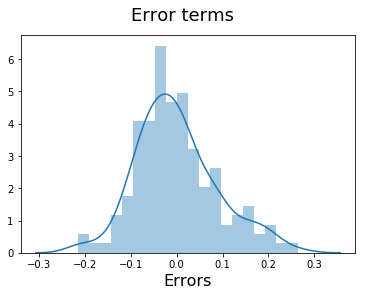

In [134]:
# plot histogram to check the distribution and error terms
fig = plt.figure()
sns.distplot((y_train-y_train_predicted),bins = 20)
fig.suptitle('Error terms', fontsize = 18)
plt.xlabel('Errors',fontsize = 16)

# Predictions and Validation of trained model

In [135]:
# Here we will use test set for predictions

In [136]:
# We use fit() for train and will use only transform for test dataset

In [137]:
df_test.shape

(62, 64)

In [138]:
df_test.head()

doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg   price  gas  turbo  hardtop  hatchback  sedan  wagon  -1  0  1  2  3  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
160           4       95.7      166.3      64.4       53.0        2094               4          98       3.19    3.03               9.0          70     4800       38          47  7738.0    1      0        0          0      1      0   0  1  0  0  0    1    0     0      0  0    1     0     0      0     1     0    0    0     0     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       1           0      0
186           4       97.3      171.7      65.5       55.7        2275               4         109       3.19    3.40               9.0          85     5250       27          34  8495.0    1      0        0          0      1      0   0  0  0  1  0    1    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           1      0
59            2       98.8      177.8      66.5       53.7        2385               4         122       3.39    3.39               8.6          84     4800       26          32  8845.0    1      0        0          1      0      0   0  0  1  0  0    1    0     0      0  0    1     0     0      0     1     0    0    0     0     0     0     0    0      0          0      0      0      0       0      1        0           0       0        0         0        0        0     0       0       0           0      0
165           2       94.5      168.7      64.0       52.6        2265               4          98       3.24    3.08               9.4         112     6600       26          29  9298.0    1      0        0          0      1      0   0  0  1  0  0    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       1           0      0
140           2       93.3      157.3      63.8       55.7        2240               4         108       3.62    2.64               8.7          73     4400       26          31  7603.0    1      0        0          1      0      0   0  0  0  1  0    0    0     0      0  0    0     1     0      0     1     0    0    0     0     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       1       0           0      0

In [139]:
# Scaling the test dataset
test_num_var = ['doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [140]:
df_test[test_num_var] = scaler.transform(df_test[test_num_var])

In [141]:
df_test.head()

doornumber  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  highwaympg     price  gas  turbo  hardtop  hatchback  sedan  wagon  -1  0  1  2  3  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
160         1.0   0.313793   0.409756  0.341667   0.460177    0.235066             0.2    0.139623   0.404762  0.424242           0.12500    0.091667  0.265306  0.694444    0.810811  0.072382    1      0        0          0      1      0   0  1  0  0  0    1    0     0      0  0    1     0     0      0     1     0    0    0     0     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       1           0      0
186         1.0   0.368966   0.497561  0.433333   0.699115    0.305275             0.2    0.181132   0.404762  0.611111           0.12500    0.154167  0.448980  0.388889    0.459459  0.093295    1      0        0          0      1      0   0  0  0  1  0    1    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       0           1      0
59          0.0   0.420690   0.596748  0.516667   0.522124    0.347944             0.2    0.230189   0.563492  0.606061           0.10000    0.150000  0.265306  0.361111    0.405405  0.102964    1      0        0          1      0      0   0  0  1  0  0    1    0     0      0  0    1     0     0      0     1     0    0    0     0     0     0     0    0      0          0      0      0      0       0      1        0           0       0        0         0        0        0     0       0       0           0      0
165         0.0   0.272414   0.448780  0.308333   0.424779    0.301396             0.2    0.139623   0.444444  0.449495           0.15000    0.266667  1.000000  0.361111    0.324324  0.115479    1      0        0          0      1      0   0  0  1  0  0    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       0       1           0      0
140         0.0   0.231034   0.263415  0.291667   0.699115    0.291699             0.2    0.177358   0.746032  0.227273           0.10625    0.104167  0.102041  0.361111    0.378378  0.068652    1      0        0          1      0      0   0  0  0  1  0    0    0     0      0  0    0     1     0      0     1     0    0    0     0     0     0     0    0      0          0      0      0      0       0      0        0           0       0        0         0        0        0     0       1       0           0      0

In [142]:
# Split the df_test into X_test and y_test

In [143]:
y_test = df_test.pop('price')
X_test = df_test

In [144]:
# Create an new X_test by selecting only those columns on which model is based

In [145]:
X_test_new = X_test[X_train_new.columns]
X_test_new.columns

Index(['enginesize', 'peakrpm', 'rear', 'idi', 'bmw'], dtype='object')

In [146]:
# Add constant to make predictions
X_test_lm = sm.add_constant(X_test_new)

In [147]:
# predict
y_test_predicted = lm.predict(X_test_lm)

Text(0, 0.5, 'y_predicted')

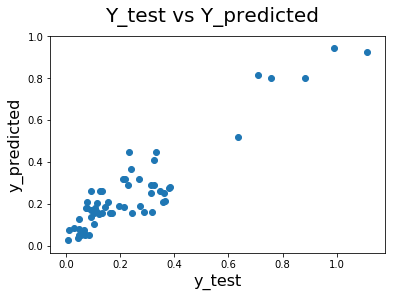

In [148]:
# Validation for model
fig = plt.figure()
plt.scatter(y_test,y_test_predicted)
fig.suptitle('Y_test vs Y_predicted',fontsize = 20)
plt.xlabel('y_test',fontsize = 16)
plt.ylabel('y_predicted',fontsize = 16)

In [149]:
# Check the r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_test_predicted)

0.8516008642843388